# 🧠 BRAIN TUMOR DETECTION MODEL USING YOLOv12 🦠


## 📦 Importing Required Libraries

In [1]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from ultralytics import YOLO
import cv2
import numpy as np
import random

## ⚙️ Configuration and Hyperparameters

In [2]:
DATASET_PATH = 'dataset'
YAML_FILE = os.path.join(DATASET_PATH, 'data.yaml')

MODEL_NAME = 'yolo11n.pt'
EPOCHS = 500
IMG_SIZE = 640
# BATCH_SIZE = 16
CONF_THRESHOLD = 0.25
IOU_THRESHOLD = 0.45

Project_Name = 'Brain Tumor Detection'
RUN_NAME = 'YOLOv12_'

TRAIN_PROJECT_NAME = Project_Name
TRAIN_RUN_NAME = 'train_'+RUN_NAME + "32"

PREDICT_PROJECT_NAME = Project_Name
PREDICT_RUN_NAME = 'prediction_'+RUN_NAME

num_images_to_predict = 10

## 🏋️ Training the YOLOv11 Model

🤖 Defining Model 📦

In [3]:
model = YOLO("yolov12n.pt", task='detect')

🧑‍🏫 Training 🏃‍♂️

In [4]:
results = model.train(
    data=YAML_FILE,
    epochs=EPOCHS,
    imgsz=IMG_SIZE,
    # batch=BATCH_SIZE,
    project=TRAIN_PROJECT_NAME,
    name=TRAIN_RUN_NAME,
    amp=True,
    patience=32,
    pretrained=True,
    optimizer='auto',
    optimize=True,
)

print("Training finished. Model saved to:", model.trainer.save_dir)

BEST_MODEL_PATH = os.path.join(model.trainer.save_dir, 'weights', 'best.pt')
print("Best model weights path:", BEST_MODEL_PATH)

New https://pypi.org/project/ultralytics/8.3.172 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.168 🚀 Python-3.12.3 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 11913MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=500, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov12n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train_YOLOv12_322, nbs=64, nms=False, opset=No

train: Scanning /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/train/labels.cache... 2144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2144/2144 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2143, len(boxes) = 2144. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


val: Fast image access ✅ (ping: 0.1±0.0 ms, read: 292.0±31.7 MB/s, size: 34.0 KB)


val: Scanning /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/valid/labels.cache... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:00<?, ?it/s]


Plotting labels to Brain Tumor Detection/train_YOLOv12_322/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 113 weight(decay=0.0), 120 weight(decay=0.0005), 119 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Brain Tumor Detection/train_YOLOv12_322
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500      3.23G      1.394      4.336      1.455         30        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.48it/s]

                   all        612        612      0.168      0.203      0.109     0.0742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      3.46G      1.289      3.263      1.306         33        640: 100%|██████████| 134/134 [00:24<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.85it/s]


                   all        612        612      0.243       0.36       0.22       0.15

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500      3.47G      1.354       2.68      1.358         26        640: 100%|██████████| 134/134 [00:24<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.01it/s]


                   all        612        612     0.0647     0.0112    0.00406    0.00207

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      3.48G      1.372      2.207      1.396         25        640: 100%|██████████| 134/134 [00:24<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.33it/s]


                   all        612        612      0.409       0.18      0.169      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      3.48G      1.365      1.926      1.412         31        640: 100%|██████████| 134/134 [00:23<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.48it/s]


                   all        612        612      0.583      0.482      0.489      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      3.48G      1.324      1.765      1.394         35        640: 100%|██████████| 134/134 [00:23<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.71it/s]

                   all        612        612      0.559      0.543      0.515      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      3.48G      1.304      1.626      1.377         19        640: 100%|██████████| 134/134 [00:23<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.51it/s]


                   all        612        612      0.526      0.358      0.383      0.237

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500      3.48G      1.278      1.537      1.378         31        640: 100%|██████████| 134/134 [00:24<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.72it/s]

                   all        612        612      0.544      0.568      0.563      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      3.48G      1.263      1.515      1.356         25        640: 100%|██████████| 134/134 [00:24<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.70it/s]

                   all        612        612      0.723       0.65      0.698      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      3.48G      1.254      1.405      1.346         24        640: 100%|██████████| 134/134 [00:23<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.72it/s]

                   all        612        612      0.721      0.701      0.767      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      3.48G      1.205      1.349      1.328         28        640: 100%|██████████| 134/134 [00:23<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.71it/s]

                   all        612        612      0.699      0.607      0.671      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      3.48G      1.211      1.326      1.321         27        640: 100%|██████████| 134/134 [00:23<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.71it/s]

                   all        612        612      0.729      0.621      0.674      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500      3.48G      1.206      1.334      1.343         28        640: 100%|██████████| 134/134 [00:23<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.72it/s]

                   all        612        612      0.755      0.644      0.714      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      3.48G      1.188       1.27      1.319         32        640: 100%|██████████| 134/134 [00:23<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.69it/s]

                   all        612        612      0.675      0.659      0.675      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      3.48G      1.197      1.251      1.325         29        640: 100%|██████████| 134/134 [00:23<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.72it/s]

                   all        612        612      0.748      0.742      0.789      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      3.48G      1.176      1.234      1.319         22        640: 100%|██████████| 134/134 [00:23<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.78it/s]

                   all        612        612      0.671       0.64      0.679      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      3.48G       1.17      1.192      1.308         24        640: 100%|██████████| 134/134 [00:24<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.73it/s]

                   all        612        612      0.659      0.571      0.601      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      3.48G      1.156      1.159       1.29         22        640: 100%|██████████| 134/134 [00:23<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.67it/s]

                   all        612        612      0.716      0.685      0.728      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      3.48G      1.154      1.163      1.291         27        640: 100%|██████████| 134/134 [00:23<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.76it/s]

                   all        612        612      0.772      0.769      0.812      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      3.48G      1.148      1.154      1.288         29        640: 100%|██████████| 134/134 [00:24<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.72it/s]

                   all        612        612      0.686      0.685      0.707      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500      3.48G      1.146      1.124      1.293         24        640: 100%|██████████| 134/134 [00:24<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.70it/s]

                   all        612        612      0.769      0.668      0.729      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      3.48G      1.129      1.102      1.286         28        640: 100%|██████████| 134/134 [00:23<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.70it/s]

                   all        612        612      0.777      0.764      0.825      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      3.48G        1.1      1.068      1.263         35        640: 100%|██████████| 134/134 [00:23<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.72it/s]

                   all        612        612        0.8      0.781      0.841      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      3.48G      1.129      1.076      1.283         21        640: 100%|██████████| 134/134 [00:24<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.70it/s]

                   all        612        612      0.754      0.716       0.76      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      3.48G      1.103      1.072      1.255         25        640: 100%|██████████| 134/134 [00:23<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.79it/s]

                   all        612        612      0.812      0.738      0.815      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500      3.48G      1.124      1.053      1.281         29        640: 100%|██████████| 134/134 [00:23<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.73it/s]

                   all        612        612      0.766      0.725      0.771       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      3.48G      1.104      1.058      1.266         25        640: 100%|██████████| 134/134 [00:22<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.19it/s]

                   all        612        612      0.793      0.792      0.833      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      3.48G      1.095      1.041      1.267         26        640: 100%|██████████| 134/134 [00:22<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.23it/s]

                   all        612        612      0.816      0.695      0.775      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      3.48G      1.093      1.014      1.249         24        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.23it/s]

                   all        612        612      0.729      0.706      0.766      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      3.48G       1.09      1.008      1.258         25        640: 100%|██████████| 134/134 [00:22<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.24it/s]

                   all        612        612      0.809      0.812      0.859      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      3.48G      1.056      0.985       1.23         37        640: 100%|██████████| 134/134 [00:22<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.20it/s]

                   all        612        612      0.855      0.822      0.873      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      3.48G       1.09     0.9868      1.268         39        640: 100%|██████████| 134/134 [00:22<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.26it/s]

                   all        612        612      0.762      0.681       0.75       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      3.48G      1.056     0.9494      1.238         25        640: 100%|██████████| 134/134 [00:22<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.23it/s]

                   all        612        612      0.865      0.804      0.863      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      3.48G      1.063     0.9687      1.247         24        640: 100%|██████████| 134/134 [00:22<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.20it/s]

                   all        612        612      0.737       0.76      0.772      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      3.48G      1.067     0.9756      1.244         30        640: 100%|██████████| 134/134 [00:22<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.23it/s]

                   all        612        612      0.854      0.787       0.86      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      3.48G      1.033     0.9324      1.225         28        640: 100%|██████████| 134/134 [00:22<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.18it/s]

                   all        612        612      0.752      0.648      0.708      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      3.49G      1.055     0.9627      1.224         33        640: 100%|██████████| 134/134 [00:22<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.18it/s]

                   all        612        612      0.832       0.79      0.857      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      3.49G       1.04     0.9184       1.22         28        640: 100%|██████████| 134/134 [00:22<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.20it/s]

                   all        612        612      0.791      0.757      0.802       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      3.49G      1.036     0.9171      1.227         22        640: 100%|██████████| 134/134 [00:22<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.24it/s]

                   all        612        612      0.833      0.751      0.816      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      3.49G      1.023     0.9006      1.206         24        640: 100%|██████████| 134/134 [00:22<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.20it/s]

                   all        612        612      0.806      0.804      0.857      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      3.49G      1.038      0.896       1.22         23        640: 100%|██████████| 134/134 [00:22<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.19it/s]

                   all        612        612       0.82      0.822      0.863      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      3.49G      1.013     0.8829      1.207         19        640: 100%|██████████| 134/134 [00:22<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.27it/s]

                   all        612        612      0.835       0.76       0.82        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      3.49G      1.025     0.8915      1.211         24        640: 100%|██████████| 134/134 [00:22<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.18it/s]

                   all        612        612      0.848      0.808      0.879      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      3.49G      1.026     0.8623      1.214         24        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.26it/s]

                   all        612        612      0.744      0.737      0.786      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      3.49G      1.026      0.889      1.211         15        640: 100%|██████████| 134/134 [00:22<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.20it/s]

                   all        612        612      0.855      0.824      0.881      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      3.49G     0.9919     0.8585      1.196         30        640: 100%|██████████| 134/134 [00:22<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.26it/s]

                   all        612        612       0.79      0.779      0.834      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      3.49G      1.005     0.8484      1.198         29        640: 100%|██████████| 134/134 [00:22<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.20it/s]

                   all        612        612      0.816      0.779      0.839      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      3.49G      1.009     0.8486      1.202         18        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.22it/s]

                   all        612        612      0.839      0.828      0.867       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500      3.49G     0.9907     0.8384      1.192         25        640: 100%|██████████| 134/134 [00:22<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.24it/s]

                   all        612        612       0.83      0.756      0.834      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      3.49G      1.011     0.8353      1.188         30        640: 100%|██████████| 134/134 [00:22<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.28it/s]

                   all        612        612      0.812      0.804      0.852      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      3.49G     0.9861     0.8192      1.176         23        640: 100%|██████████| 134/134 [00:22<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.22it/s]

                   all        612        612      0.808      0.756        0.8       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      3.49G     0.9915     0.8264      1.193         29        640: 100%|██████████| 134/134 [00:22<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.23it/s]

                   all        612        612       0.79      0.726       0.78      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      3.49G      0.998     0.8432      1.191         35        640: 100%|██████████| 134/134 [00:22<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.24it/s]

                   all        612        612      0.865      0.825      0.888      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      3.49G     0.9906     0.8125       1.19         23        640: 100%|██████████| 134/134 [00:22<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.24it/s]

                   all        612        612      0.827      0.703      0.786      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      3.49G     0.9769     0.7969      1.179         29        640: 100%|██████████| 134/134 [00:22<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.26it/s]

                   all        612        612      0.853      0.748      0.828      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      3.49G     0.9935     0.8051      1.193         25        640: 100%|██████████| 134/134 [00:23<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.78it/s]

                   all        612        612      0.841      0.837      0.882      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      3.49G     0.9652     0.7884      1.169         23        640: 100%|██████████| 134/134 [00:23<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.82it/s]

                   all        612        612      0.812      0.802      0.841      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      3.49G     0.9554     0.7845      1.164         22        640: 100%|██████████| 134/134 [00:23<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.78it/s]

                   all        612        612      0.856      0.828      0.882      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      3.49G     0.9725     0.7982      1.181         27        640: 100%|██████████| 134/134 [00:23<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.74it/s]

                   all        612        612      0.802      0.718      0.775       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      3.49G     0.9625     0.7894      1.165         21        640: 100%|██████████| 134/134 [00:23<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.78it/s]

                   all        612        612      0.867      0.827       0.88      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      3.49G     0.9765     0.7769       1.18         20        640: 100%|██████████| 134/134 [00:23<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.75it/s]

                   all        612        612       0.87      0.838      0.895      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      3.49G     0.9714      0.789      1.184         29        640: 100%|██████████| 134/134 [00:23<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.71it/s]

                   all        612        612      0.843      0.837      0.888      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      3.49G     0.9749     0.8018      1.178         22        640: 100%|██████████| 134/134 [00:24<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.74it/s]

                   all        612        612      0.846      0.837      0.885      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      3.49G     0.9663     0.7791      1.182         24        640: 100%|██████████| 134/134 [00:23<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.77it/s]

                   all        612        612      0.829      0.819      0.872      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      3.49G     0.9551     0.7785      1.168         30        640: 100%|██████████| 134/134 [00:23<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.81it/s]

                   all        612        612      0.882       0.85      0.899      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500      3.49G     0.9499     0.7572      1.157         27        640: 100%|██████████| 134/134 [00:23<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.75it/s]

                   all        612        612      0.872      0.851      0.894      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      3.49G      0.965     0.7532      1.172         23        640: 100%|██████████| 134/134 [00:23<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.79it/s]

                   all        612        612      0.877      0.857      0.902      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      3.49G     0.9694     0.7653      1.179         32        640: 100%|██████████| 134/134 [00:23<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.76it/s]

                   all        612        612      0.833      0.824      0.862       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      3.49G     0.9523     0.7729      1.162         29        640: 100%|██████████| 134/134 [00:23<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.74it/s]

                   all        612        612      0.884      0.821      0.889      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      3.49G     0.9477     0.7316      1.153         23        640: 100%|██████████| 134/134 [00:23<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.78it/s]

                   all        612        612      0.924      0.829      0.903      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      3.49G     0.9457     0.7597      1.162         31        640: 100%|██████████| 134/134 [00:24<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.74it/s]

                   all        612        612      0.848      0.844      0.898      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      3.49G     0.9472     0.7157      1.156         23        640: 100%|██████████| 134/134 [00:23<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.82it/s]

                   all        612        612      0.854      0.813      0.857      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500      3.49G     0.9561     0.7432      1.158         28        640: 100%|██████████| 134/134 [00:23<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.72it/s]

                   all        612        612      0.893      0.843      0.903      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      3.49G     0.9281     0.7208      1.161         27        640: 100%|██████████| 134/134 [00:23<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.79it/s]

                   all        612        612       0.87      0.802      0.867      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500      3.49G     0.9337     0.7409      1.155         25        640: 100%|██████████| 134/134 [00:24<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.82it/s]

                   all        612        612      0.849       0.81      0.872      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      3.49G      0.929     0.7193       1.14         18        640: 100%|██████████| 134/134 [00:23<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.79it/s]

                   all        612        612      0.867      0.847      0.895      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500      3.49G     0.9085     0.7043      1.129         23        640: 100%|██████████| 134/134 [00:23<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.80it/s]

                   all        612        612      0.884      0.857      0.905      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      3.49G     0.9256     0.7155      1.148         24        640: 100%|██████████| 134/134 [00:23<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.08it/s]

                   all        612        612      0.874      0.835      0.884      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      3.49G     0.9157     0.7002      1.138         33        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.25it/s]

                   all        612        612      0.879      0.856      0.907      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      3.49G     0.9255     0.7252      1.151         24        640: 100%|██████████| 134/134 [00:22<00:00,  5.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.24it/s]

                   all        612        612      0.857      0.823       0.87      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      3.49G     0.9108     0.7069      1.137         25        640: 100%|██████████| 134/134 [00:23<00:00,  5.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.82it/s]

                   all        612        612      0.871      0.854      0.901      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      3.49G     0.9233     0.7014       1.14         27        640: 100%|██████████| 134/134 [00:24<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.61it/s]

                   all        612        612      0.868      0.806       0.86      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      3.49G     0.9216     0.7098       1.15         26        640: 100%|██████████| 134/134 [00:24<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.61it/s]

                   all        612        612      0.876      0.863      0.907      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      3.49G     0.9174     0.7088      1.143         18        640: 100%|██████████| 134/134 [00:24<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.67it/s]

                   all        612        612      0.899      0.849      0.903      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500      3.49G     0.9126      0.696      1.129         29        640: 100%|██████████| 134/134 [00:24<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.54it/s]

                   all        612        612      0.886      0.793      0.865      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      3.49G     0.8917      0.694      1.121         28        640: 100%|██████████| 134/134 [00:25<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.22it/s]

                   all        612        612       0.86      0.869      0.905      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      3.49G     0.9116     0.7119      1.147         32        640: 100%|██████████| 134/134 [00:25<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.51it/s]

                   all        612        612      0.859       0.84      0.881      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      3.49G     0.9102     0.6863       1.13         19        640: 100%|██████████| 134/134 [00:25<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.38it/s]

                   all        612        612      0.886      0.851      0.909      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      3.49G     0.8982     0.6804      1.124         31        640: 100%|██████████| 134/134 [00:25<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.48it/s]

                   all        612        612       0.88      0.816      0.873      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500      3.49G     0.9117     0.6903      1.131         29        640: 100%|██████████| 134/134 [00:25<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.50it/s]

                   all        612        612      0.868      0.808      0.878       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      3.49G     0.9106     0.6795      1.136         37        640: 100%|██████████| 134/134 [00:25<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.33it/s]

                   all        612        612      0.869      0.868      0.903      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      3.49G     0.8766     0.6578      1.111         27        640: 100%|██████████| 134/134 [00:25<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.49it/s]

                   all        612        612      0.898      0.864      0.904      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500      3.49G     0.9013     0.6723      1.127         29        640: 100%|██████████| 134/134 [00:25<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.34it/s]

                   all        612        612      0.876      0.861       0.91      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500      3.49G     0.8811     0.6448       1.11         19        640: 100%|██████████| 134/134 [00:25<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.51it/s]

                   all        612        612      0.882      0.831      0.879      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500      3.49G      0.871     0.6362      1.113         19        640: 100%|██████████| 134/134 [00:25<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.49it/s]

                   all        612        612      0.897       0.87      0.911      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      3.49G     0.8707     0.6567      1.107         23        640: 100%|██████████| 134/134 [00:25<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.45it/s]

                   all        612        612      0.864      0.851      0.888      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500      3.49G     0.8861     0.6475      1.118         32        640: 100%|██████████| 134/134 [00:25<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.47it/s]

                   all        612        612       0.91      0.822      0.898      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      3.49G     0.8705      0.667      1.122         31        640: 100%|██████████| 134/134 [00:25<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.45it/s]

                   all        612        612      0.867      0.854      0.893      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      3.49G     0.8609     0.6523      1.106         26        640: 100%|██████████| 134/134 [00:25<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.48it/s]

                   all        612        612      0.877      0.773      0.851       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      3.49G     0.8948      0.675      1.127         24        640: 100%|██████████| 134/134 [00:25<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.45it/s]

                   all        612        612      0.878      0.791      0.854      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500      3.49G     0.8512       0.62      1.103         27        640: 100%|██████████| 134/134 [00:25<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.37it/s]

                   all        612        612      0.891      0.814      0.883      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      3.49G     0.8877     0.6599      1.118         30        640: 100%|██████████| 134/134 [00:25<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.47it/s]

                   all        612        612      0.904      0.828      0.882       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500      3.49G     0.8712     0.6415      1.106         19        640: 100%|██████████| 134/134 [00:25<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.49it/s]

                   all        612        612      0.871      0.872      0.898      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      3.49G     0.8607     0.6474      1.109         19        640: 100%|██████████| 134/134 [00:24<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.39it/s]

                   all        612        612      0.889      0.872      0.913      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500      3.49G     0.8549     0.6243      1.103         16        640: 100%|██████████| 134/134 [00:24<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.52it/s]

                   all        612        612      0.905      0.845      0.904       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500      3.49G     0.8623     0.6327      1.101         22        640: 100%|██████████| 134/134 [00:24<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.38it/s]

                   all        612        612      0.889       0.85      0.897      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500      3.49G     0.8663     0.6237      1.107         19        640: 100%|██████████| 134/134 [00:25<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.44it/s]

                   all        612        612      0.904      0.841      0.913      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      3.49G     0.8788     0.6378      1.115         23        640: 100%|██████████| 134/134 [00:24<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.19it/s]

                   all        612        612      0.918      0.836      0.909      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500      3.49G     0.8538     0.6321      1.101         31        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.25it/s]

                   all        612        612      0.897      0.862      0.907      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500      3.49G      0.841     0.6094      1.085         19        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.23it/s]

                   all        612        612      0.894      0.844        0.9      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500      3.49G     0.8829     0.6599      1.127         21        640: 100%|██████████| 134/134 [00:22<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.21it/s]

                   all        612        612      0.903      0.884       0.92      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      3.49G     0.8569     0.6135      1.102         28        640: 100%|██████████| 134/134 [00:22<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.07it/s]

                   all        612        612      0.884      0.875      0.912      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      3.49G      0.845     0.6309      1.091         22        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.27it/s]

                   all        612        612      0.858      0.832      0.887      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500      3.49G     0.8391     0.6084      1.094         18        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.23it/s]

                   all        612        612      0.833      0.839      0.871      0.642



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500      3.49G     0.8591     0.6278      1.099         21        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.22it/s]

                   all        612        612      0.827      0.822      0.864      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      3.49G     0.8335     0.6003      1.089         27        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.24it/s]

                   all        612        612       0.87      0.865      0.896      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500      3.49G     0.8421     0.5989      1.089         33        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.16it/s]

                   all        612        612      0.865      0.863      0.907      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      3.49G     0.8542     0.6113      1.097         19        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.29it/s]

                   all        612        612      0.891      0.851      0.896      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500      3.49G     0.8362     0.5931      1.084         28        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.16it/s]

                   all        612        612       0.88      0.848      0.904      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      3.49G     0.8216       0.59      1.079         28        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.23it/s]

                   all        612        612      0.914      0.865      0.919      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      3.49G     0.8531     0.6054      1.103         26        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.28it/s]

                   all        612        612      0.901      0.872      0.919      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      3.49G     0.8465     0.6105      1.094         19        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.28it/s]

                   all        612        612      0.893      0.885       0.92      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      3.49G     0.8295      0.606       1.08         29        640: 100%|██████████| 134/134 [00:22<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.22it/s]

                   all        612        612      0.921      0.858      0.924      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      3.49G     0.8168     0.5782      1.076         23        640: 100%|██████████| 134/134 [00:22<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.23it/s]

                   all        612        612      0.904      0.876      0.919      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500      3.49G     0.8257     0.5855      1.084         27        640: 100%|██████████| 134/134 [00:22<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.30it/s]

                   all        612        612      0.911      0.869      0.922      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500      3.49G     0.8227     0.5867      1.072         26        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.31it/s]

                   all        612        612      0.906      0.845      0.903      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500      3.49G     0.8328     0.6094      1.091         24        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.24it/s]

                   all        612        612      0.885      0.861      0.913      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500      3.49G     0.8303     0.5912      1.075         21        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.22it/s]

                   all        612        612      0.903      0.876      0.916       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/500      3.49G     0.8327     0.5885      1.085         24        640: 100%|██████████| 134/134 [00:22<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.27it/s]

                   all        612        612      0.904       0.86      0.921        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/500      3.49G     0.8178     0.5865      1.071         30        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.21it/s]

                   all        612        612       0.88      0.873      0.907      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/500      3.49G     0.8121     0.5787       1.08         28        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.22it/s]

                   all        612        612       0.89      0.874      0.912      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/500      3.49G     0.8238     0.5717      1.077         16        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.88it/s]

                   all        612        612      0.901      0.872       0.92        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/500      3.49G     0.8149      0.571      1.079         27        640: 100%|██████████| 134/134 [00:24<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.54it/s]

                   all        612        612      0.912      0.862      0.913      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/500      3.49G     0.8134     0.5672      1.076         24        640: 100%|██████████| 134/134 [00:25<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.50it/s]

                   all        612        612      0.893      0.872      0.921      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/500      3.49G     0.8189     0.5834      1.067         22        640: 100%|██████████| 134/134 [00:25<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.48it/s]

                   all        612        612      0.899      0.873      0.921      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/500      3.49G     0.8239     0.5781      1.084         32        640: 100%|██████████| 134/134 [00:25<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.42it/s]

                   all        612        612      0.921       0.87      0.924      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/500      3.49G     0.8127     0.5511      1.073         18        640: 100%|██████████| 134/134 [00:24<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.52it/s]

                   all        612        612        0.9      0.885      0.915      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/500      3.49G     0.8077     0.5681      1.062         19        640: 100%|██████████| 134/134 [00:25<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.56it/s]

                   all        612        612      0.904      0.854        0.9       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/500      3.49G     0.7955     0.5594      1.063         25        640: 100%|██████████| 134/134 [00:25<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.46it/s]

                   all        612        612      0.899      0.874      0.919      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/500      3.49G     0.8106     0.5579      1.073         28        640: 100%|██████████| 134/134 [00:25<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.47it/s]

                   all        612        612      0.903      0.871      0.913      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/500      3.49G     0.8185     0.5767      1.086         22        640: 100%|██████████| 134/134 [00:25<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.37it/s]

                   all        612        612      0.886      0.867      0.913      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/500      3.49G      0.795     0.5506       1.05         31        640: 100%|██████████| 134/134 [00:25<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.25it/s]

                   all        612        612      0.903      0.828      0.897      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/500      3.49G     0.8122     0.5868       1.08         25        640: 100%|██████████| 134/134 [00:25<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.50it/s]

                   all        612        612      0.914      0.845      0.906      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/500      3.49G     0.8198     0.5783      1.077         23        640: 100%|██████████| 134/134 [00:25<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.51it/s]

                   all        612        612      0.908      0.852      0.906      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/500      3.49G     0.7999     0.5561      1.058         30        640: 100%|██████████| 134/134 [00:25<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.50it/s]

                   all        612        612      0.897      0.821      0.886      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/500      3.49G     0.8056     0.5634      1.067         22        640: 100%|██████████| 134/134 [00:25<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.43it/s]

                   all        612        612      0.871      0.874      0.915       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/500      3.49G     0.7823     0.5446      1.051         23        640: 100%|██████████| 134/134 [00:25<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.45it/s]

                   all        612        612      0.914      0.868      0.919      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/500      3.49G     0.7928     0.5399      1.063         36        640: 100%|██████████| 134/134 [00:25<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.49it/s]

                   all        612        612      0.906      0.875      0.916      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/500      3.49G     0.7934     0.5439      1.055         24        640: 100%|██████████| 134/134 [00:25<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.39it/s]

                   all        612        612      0.883      0.888      0.919       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/500      3.49G     0.7994     0.5644      1.064         28        640: 100%|██████████| 134/134 [00:25<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.35it/s]

                   all        612        612      0.916      0.859      0.913      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/500      3.49G     0.7968     0.5476      1.061         22        640: 100%|██████████| 134/134 [00:25<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.33it/s]

                   all        612        612      0.919      0.857      0.926      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/500      3.49G     0.8022     0.5644      1.067         36        640: 100%|██████████| 134/134 [00:25<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.30it/s]

                   all        612        612      0.915      0.855      0.915      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/500      3.49G     0.7869     0.5467      1.051         26        640: 100%|██████████| 134/134 [00:25<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.42it/s]

                   all        612        612       0.88      0.888      0.914        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/500      3.49G     0.7924      0.542      1.054         23        640: 100%|██████████| 134/134 [00:25<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.64it/s]

                   all        612        612      0.878      0.871      0.902       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/500      3.49G     0.7821     0.5355      1.058         30        640: 100%|██████████| 134/134 [00:24<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.86it/s]

                   all        612        612        0.9      0.855      0.904      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/500      3.49G     0.7704     0.5245      1.048         41        640: 100%|██████████| 134/134 [00:24<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.66it/s]

                   all        612        612      0.892      0.878      0.915      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/500      3.49G     0.7744     0.5295      1.051         25        640: 100%|██████████| 134/134 [00:24<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.76it/s]

                   all        612        612      0.903      0.859      0.925      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/500      3.49G     0.7758     0.5293      1.055         24        640: 100%|██████████| 134/134 [00:24<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.81it/s]

                   all        612        612      0.901       0.87       0.91      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/500      3.49G     0.7846     0.5339      1.046         26        640: 100%|██████████| 134/134 [00:24<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.73it/s]

                   all        612        612      0.893      0.873      0.914      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/500      3.49G     0.7853     0.5364      1.057         17        640: 100%|██████████| 134/134 [00:24<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.71it/s]

                   all        612        612      0.898      0.869      0.913       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/500      3.49G     0.7939     0.5455      1.051         22        640: 100%|██████████| 134/134 [00:24<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.11it/s]

                   all        612        612      0.894      0.882      0.922      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/500      3.49G       0.78     0.5179      1.052         24        640: 100%|██████████| 134/134 [00:26<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.85it/s]

                   all        612        612      0.897      0.886      0.921        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/500      3.49G     0.7801     0.5256       1.06         23        640: 100%|██████████| 134/134 [00:26<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.05it/s]

                   all        612        612       0.91      0.856      0.919      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/500      3.49G     0.7799       0.53      1.056         23        640: 100%|██████████| 134/134 [00:26<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.04it/s]

                   all        612        612      0.928      0.859      0.924      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/500      3.49G       0.76      0.512      1.048         30        640: 100%|██████████| 134/134 [00:26<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.95it/s]

                   all        612        612      0.883      0.869       0.91      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/500      3.49G     0.7885      0.534      1.049         23        640: 100%|██████████| 134/134 [00:26<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.04it/s]

                   all        612        612      0.922      0.859      0.926      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/500      3.49G     0.7688      0.526      1.044         25        640: 100%|██████████| 134/134 [00:26<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.08it/s]

                   all        612        612      0.916      0.875      0.926      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/500      3.49G     0.7599     0.5128       1.04         33        640: 100%|██████████| 134/134 [00:26<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.03it/s]

                   all        612        612      0.878      0.881      0.917      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/500      3.49G     0.7755     0.5289      1.045         29        640: 100%|██████████| 134/134 [00:26<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.04it/s]

                   all        612        612      0.913      0.861      0.919      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/500      3.49G     0.7694     0.5127      1.043         30        640: 100%|██████████| 134/134 [00:26<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.10it/s]

                   all        612        612      0.873      0.896       0.92      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/500      3.49G      0.756     0.5173       1.04         27        640: 100%|██████████| 134/134 [00:26<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.02it/s]

                   all        612        612      0.897      0.902      0.921      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/500      3.49G     0.7495     0.5164      1.039         32        640: 100%|██████████| 134/134 [00:26<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.93it/s]

                   all        612        612      0.913      0.878      0.921      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/500      3.49G     0.7562     0.5125      1.044         24        640: 100%|██████████| 134/134 [00:26<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.02it/s]

                   all        612        612      0.934      0.846      0.916      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/500      3.49G      0.766     0.5148      1.041         24        640: 100%|██████████| 134/134 [00:26<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.01it/s]

                   all        612        612      0.902       0.87      0.921      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/500      3.49G      0.759     0.5162      1.039         20        640: 100%|██████████| 134/134 [00:26<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.10it/s]

                   all        612        612      0.907      0.878      0.923      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/500      3.49G     0.7475     0.4991       1.04         24        640: 100%|██████████| 134/134 [00:26<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.08it/s]

                   all        612        612      0.924      0.856      0.915      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/500      3.49G     0.7494     0.5097      1.036         29        640: 100%|██████████| 134/134 [00:26<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.07it/s]

                   all        612        612      0.911      0.888      0.925      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/500      3.49G     0.7568     0.5122      1.045         22        640: 100%|██████████| 134/134 [00:26<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.93it/s]

                   all        612        612      0.916       0.87      0.926      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/500      3.49G     0.7518     0.5102      1.038         18        640: 100%|██████████| 134/134 [00:26<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.99it/s]

                   all        612        612      0.941      0.865      0.935      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/500      3.49G     0.7514     0.5075      1.035         24        640: 100%|██████████| 134/134 [00:26<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.99it/s]

                   all        612        612      0.922       0.88      0.921      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/500      3.49G     0.7525     0.5035      1.034         22        640: 100%|██████████| 134/134 [00:26<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.02it/s]

                   all        612        612       0.92       0.88       0.93      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/500      3.49G     0.7622     0.5213      1.044         23        640: 100%|██████████| 134/134 [00:26<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.06it/s]

                   all        612        612      0.904      0.884      0.924      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/500      3.49G     0.7484     0.5011      1.037         31        640: 100%|██████████| 134/134 [00:26<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.99it/s]

                   all        612        612      0.909      0.866       0.93      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/500      3.49G     0.7415     0.4921      1.037         23        640: 100%|██████████| 134/134 [00:26<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.96it/s]

                   all        612        612      0.906      0.873      0.929      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/500      3.49G     0.7617     0.5138      1.041         29        640: 100%|██████████| 134/134 [00:26<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.07it/s]

                   all        612        612      0.914       0.87      0.926      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/500      3.49G     0.7461     0.4962      1.028         31        640: 100%|██████████| 134/134 [00:26<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.08it/s]

                   all        612        612       0.92      0.884      0.931      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/500      3.49G     0.7326     0.4911      1.033         29        640: 100%|██████████| 134/134 [00:26<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.03it/s]

                   all        612        612      0.913      0.867      0.925      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/500      3.49G      0.738     0.4867       1.03         22        640: 100%|██████████| 134/134 [00:26<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.97it/s]

                   all        612        612      0.907      0.894      0.926      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/500      3.49G     0.7407     0.4979      1.034         30        640: 100%|██████████| 134/134 [00:26<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.06it/s]

                   all        612        612      0.883      0.882      0.916      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/500      3.49G     0.7252     0.4782      1.023         29        640: 100%|██████████| 134/134 [00:26<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.07it/s]

                   all        612        612      0.895      0.882      0.922      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/500      3.49G     0.7283     0.4772      1.021         26        640: 100%|██████████| 134/134 [00:26<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.04it/s]

                   all        612        612      0.915      0.878      0.927       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/500      3.49G     0.7496     0.5043       1.04         21        640: 100%|██████████| 134/134 [00:26<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.04it/s]

                   all        612        612      0.906      0.896      0.928      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/500      3.49G     0.7371     0.4853      1.028         23        640: 100%|██████████| 134/134 [00:26<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.01it/s]

                   all        612        612      0.909       0.89      0.928      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/500      3.49G     0.7219     0.4803      1.019         34        640: 100%|██████████| 134/134 [00:26<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.06it/s]

                   all        612        612      0.945      0.874      0.937      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/500      3.49G     0.7319      0.477      1.027         21        640: 100%|██████████| 134/134 [00:26<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.90it/s]

                   all        612        612      0.909       0.88      0.928      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/500      3.49G     0.7316     0.4854      1.026         16        640: 100%|██████████| 134/134 [00:26<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.05it/s]

                   all        612        612      0.906      0.895       0.93      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/500      3.49G     0.7059     0.4697       1.01         31        640: 100%|██████████| 134/134 [00:26<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.01it/s]

                   all        612        612      0.923      0.875      0.925      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/500      3.49G     0.7357     0.4846      1.031         23        640: 100%|██████████| 134/134 [00:25<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.60it/s]

                   all        612        612      0.917      0.865       0.92      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/500      3.49G     0.7225     0.4849      1.027         25        640: 100%|██████████| 134/134 [00:24<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.70it/s]

                   all        612        612      0.923      0.861      0.921      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/500      3.49G     0.7319      0.471      1.029         24        640: 100%|██████████| 134/134 [00:24<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.75it/s]

                   all        612        612      0.884      0.891      0.924      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/500      3.49G     0.7229     0.4763      1.018         33        640: 100%|██████████| 134/134 [00:24<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.72it/s]


                   all        612        612      0.917      0.882      0.931      0.717

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/500      3.49G      0.735     0.4892      1.025         23        640: 100%|██████████| 134/134 [00:24<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.82it/s]

                   all        612        612      0.907      0.883      0.929      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/500      3.49G     0.7161     0.4681      1.015         24        640: 100%|██████████| 134/134 [00:24<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.43it/s]

                   all        612        612      0.897      0.887       0.92      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/500      3.49G     0.7171     0.4695      1.015         21        640: 100%|██████████| 134/134 [00:25<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.46it/s]

                   all        612        612      0.917      0.879      0.927      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/500      3.49G     0.7359     0.4713      1.022         26        640: 100%|██████████| 134/134 [00:25<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.33it/s]

                   all        612        612      0.903      0.889       0.93       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/500      3.49G     0.7117     0.4814      1.016         32        640: 100%|██████████| 134/134 [00:25<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.50it/s]

                   all        612        612      0.914      0.881      0.928      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/500      3.49G     0.7301       0.49      1.029         31        640: 100%|██████████| 134/134 [00:25<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.51it/s]

                   all        612        612      0.941       0.88      0.934      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/500      3.49G     0.7095     0.4691      1.016         28        640: 100%|██████████| 134/134 [00:25<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.35it/s]

                   all        612        612      0.916       0.88      0.934      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/500      3.49G     0.7254     0.4924      1.024         25        640: 100%|██████████| 134/134 [00:25<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.49it/s]

                   all        612        612      0.924      0.869      0.934      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/500      3.49G     0.6941     0.4637      1.008         20        640: 100%|██████████| 134/134 [00:25<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.29it/s]

                   all        612        612      0.907      0.895      0.935      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/500      3.49G      0.717     0.4696       1.01         24        640: 100%|██████████| 134/134 [00:25<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.39it/s]

                   all        612        612      0.908      0.898      0.938      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/500      3.49G     0.7063     0.4624      1.014         33        640: 100%|██████████| 134/134 [00:25<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.54it/s]

                   all        612        612      0.918      0.887      0.933      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/500      3.49G     0.6877     0.4519     0.9972         23        640: 100%|██████████| 134/134 [00:25<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.53it/s]

                   all        612        612      0.913      0.888      0.933      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/500      3.49G     0.6945      0.451      1.003         29        640: 100%|██████████| 134/134 [00:25<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.50it/s]

                   all        612        612       0.91      0.885      0.933      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/500      3.49G     0.6923     0.4532      0.998         17        640: 100%|██████████| 134/134 [00:24<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.50it/s]

                   all        612        612      0.926       0.87      0.933      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/500      3.49G     0.7039     0.4652      1.012         30        640: 100%|██████████| 134/134 [00:24<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.50it/s]

                   all        612        612      0.919      0.881      0.934       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/500      3.49G     0.7064     0.4588       1.01         18        640: 100%|██████████| 134/134 [00:25<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.48it/s]

                   all        612        612      0.927      0.871      0.933      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/500      3.49G     0.7092     0.4676      1.017         30        640: 100%|██████████| 134/134 [00:25<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.46it/s]

                   all        612        612      0.898      0.895      0.927      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/500      3.49G     0.7132     0.4706      1.009         29        640: 100%|██████████| 134/134 [00:25<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.42it/s]

                   all        612        612      0.912      0.883      0.928      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/500      3.49G     0.7061     0.4633      1.009         25        640: 100%|██████████| 134/134 [00:25<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.47it/s]

                   all        612        612      0.915       0.87      0.924      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/500      3.49G     0.6935     0.4586      1.006         21        640: 100%|██████████| 134/134 [00:25<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.51it/s]

                   all        612        612      0.933      0.864      0.932      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/500      3.49G     0.6895     0.4441     0.9973         34        640: 100%|██████████| 134/134 [00:25<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.53it/s]

                   all        612        612      0.917      0.885      0.932      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/500      3.49G     0.7054     0.4545      1.009         27        640: 100%|██████████| 134/134 [00:25<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.46it/s]

                   all        612        612      0.907      0.884      0.928      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/500      3.49G     0.6889     0.4492     0.9997         23        640: 100%|██████████| 134/134 [00:25<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.47it/s]

                   all        612        612      0.898      0.882      0.923      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/500      3.49G     0.6939     0.4393      1.005         21        640: 100%|██████████| 134/134 [00:25<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.54it/s]

                   all        612        612      0.922      0.855      0.921      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/500      3.49G     0.6939      0.446      1.003         28        640: 100%|██████████| 134/134 [00:25<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.51it/s]

                   all        612        612      0.913       0.88      0.921      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/500      3.49G     0.6911     0.4479      1.008         23        640: 100%|██████████| 134/134 [00:25<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.54it/s]

                   all        612        612      0.923      0.874      0.921      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/500      3.49G      0.698     0.4534      1.013         21        640: 100%|██████████| 134/134 [00:25<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.50it/s]

                   all        612        612      0.918      0.874      0.927      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/500      3.49G     0.7079     0.4711      1.013         21        640: 100%|██████████| 134/134 [00:23<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.17it/s]

                   all        612        612      0.935      0.863      0.928       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/500      3.49G      0.697     0.4549      1.011         25        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.30it/s]

                   all        612        612      0.929      0.875      0.932      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/500      3.49G     0.6964     0.4405      1.004         29        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.22it/s]

                   all        612        612      0.932      0.885      0.931      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/500      3.49G     0.6803     0.4473     0.9923         29        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.17it/s]

                   all        612        612      0.927      0.877      0.933      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/500      3.49G      0.681     0.4378     0.9975         28        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.31it/s]

                   all        612        612      0.909      0.879      0.927      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/500      3.49G     0.7027      0.455      1.013         27        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.28it/s]

                   all        612        612      0.895      0.889      0.927      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/500      3.49G     0.6725     0.4341       0.99         36        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.22it/s]

                   all        612        612      0.906      0.886      0.929      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/500      3.49G     0.6703     0.4391     0.9894         25        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.17it/s]

                   all        612        612      0.896      0.897      0.933      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/500      3.49G     0.6672     0.4357     0.9891         22        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.25it/s]

                   all        612        612      0.925      0.869       0.93      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/500      3.49G     0.6775     0.4381     0.9932         24        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.32it/s]

                   all        612        612      0.936      0.864      0.931      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/500      3.49G     0.6802     0.4522      1.003         33        640: 100%|██████████| 134/134 [00:22<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.31it/s]

                   all        612        612      0.937      0.862       0.93      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/500      3.49G     0.6788     0.4414     0.9973         24        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.26it/s]

                   all        612        612      0.914      0.878       0.93      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/500      3.49G     0.6703     0.4395     0.9985         31        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.27it/s]

                   all        612        612      0.931      0.871      0.934      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/500      3.49G      0.662     0.4305     0.9952         22        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.15it/s]

                   all        612        612       0.92      0.876      0.928      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/500      3.49G     0.6798     0.4433     0.9956         22        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.32it/s]

                   all        612        612       0.91      0.889      0.927       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/500      3.49G     0.6845     0.4391      1.002         25        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.27it/s]

                   all        612        612       0.93      0.871      0.924      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/500      3.49G     0.6772     0.4402     0.9944         35        640: 100%|██████████| 134/134 [00:22<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.31it/s]

                   all        612        612       0.93      0.868      0.924      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/500      3.49G     0.6756     0.4313      0.993         32        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.21it/s]

                   all        612        612      0.924       0.87      0.926      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/500      3.49G     0.6697     0.4422     0.9955         22        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.23it/s]

                   all        612        612       0.91       0.88      0.923      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/500      3.49G     0.6858     0.4519      1.006         27        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.34it/s]

                   all        612        612      0.919      0.875      0.928      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/500      3.49G      0.651      0.421     0.9812         31        640: 100%|██████████| 134/134 [00:22<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.27it/s]

                   all        612        612      0.919      0.876      0.929      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/500      3.49G     0.6855     0.4482      1.003         24        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.33it/s]

                   all        612        612       0.92      0.878      0.929       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/500      3.49G     0.6646      0.437     0.9864         33        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.24it/s]

                   all        612        612      0.924      0.878      0.931      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/500      3.49G     0.6714      0.429     0.9927         34        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.33it/s]

                   all        612        612      0.926      0.881      0.933      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/500      3.49G     0.6663     0.4189     0.9894         29        640: 100%|██████████| 134/134 [00:22<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.37it/s]

                   all        612        612      0.907       0.89      0.932       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/500      3.49G     0.6611     0.4376     0.9889         22        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.30it/s]

                   all        612        612       0.91      0.888      0.931      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/500      3.49G     0.6541     0.4247     0.9859         33        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.32it/s]

                   all        612        612      0.928      0.872      0.928      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/500      3.49G     0.6637     0.4291     0.9839         21        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.27it/s]

                   all        612        612      0.934      0.871      0.934      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/500      3.49G     0.6558     0.4225     0.9892         26        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.26it/s]

                   all        612        612      0.917      0.885      0.933      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/500      3.49G     0.6626     0.4294     0.9893         28        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.26it/s]

                   all        612        612      0.907      0.895      0.932      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/500      3.49G     0.6689     0.4324     0.9925         22        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.26it/s]

                   all        612        612      0.907       0.89      0.929      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/500      3.49G     0.6695      0.437     0.9973         31        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.30it/s]

                   all        612        612      0.907       0.89       0.93      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/500      3.49G     0.6419     0.4198      0.978         24        640: 100%|██████████| 134/134 [00:22<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.30it/s]

                   all        612        612      0.912      0.884      0.929      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/500      3.49G      0.648      0.421     0.9815         27        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.22it/s]

                   all        612        612      0.902      0.889      0.931      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/500      3.49G     0.6416     0.4117     0.9799         20        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.20it/s]

                   all        612        612      0.915      0.878      0.927      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/500      3.49G     0.6601     0.4274     0.9905         20        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.29it/s]

                   all        612        612       0.91      0.891       0.93      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/500      3.49G     0.6377       0.41     0.9768         23        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.27it/s]

                   all        612        612      0.926      0.859      0.926      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/500      3.49G     0.6432     0.4156     0.9794         24        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.26it/s]

                   all        612        612      0.894      0.892      0.929      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/500      3.49G     0.6517     0.4205     0.9821         26        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.22it/s]

                   all        612        612      0.919      0.878       0.93      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/500      3.49G     0.6523     0.4181     0.9855         29        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.25it/s]

                   all        612        612      0.916       0.88      0.929      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/500      3.49G     0.6432     0.4164     0.9796         22        640: 100%|██████████| 134/134 [00:22<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.24it/s]

                   all        612        612      0.894      0.889      0.927      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/500      3.49G      0.637     0.4093     0.9771         27        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.33it/s]

                   all        612        612       0.92      0.864      0.926      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/500      3.49G     0.6346     0.4131     0.9747         26        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.26it/s]

                   all        612        612      0.922      0.868      0.926      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/500      3.49G     0.6436     0.4212      0.989         25        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.28it/s]

                   all        612        612      0.889      0.888      0.924      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/500      3.49G     0.6546     0.4149     0.9889         23        640: 100%|██████████| 134/134 [00:22<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.30it/s]

                   all        612        612      0.896       0.89      0.925      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/500      3.49G     0.6415     0.4164     0.9773         22        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.30it/s]

                   all        612        612        0.9      0.889      0.926      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/500      3.49G     0.6423      0.406     0.9734         36        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.33it/s]

                   all        612        612      0.892      0.896      0.925      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/500      3.49G     0.6426     0.4097     0.9789         27        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.29it/s]

                   all        612        612      0.904      0.881      0.924      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/500      3.49G     0.6338     0.4133     0.9786         22        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.18it/s]

                   all        612        612      0.909      0.881      0.925      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/500      3.49G     0.6376     0.4051     0.9762         17        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.32it/s]

                   all        612        612      0.899      0.879      0.927      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/500      3.49G     0.6294     0.4099     0.9729         26        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.26it/s]

                   all        612        612        0.9      0.874       0.93      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/500      3.49G     0.6311     0.3998     0.9661         24        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.36it/s]

                   all        612        612      0.915      0.864      0.931      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/500      3.49G     0.6393      0.401     0.9759         24        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.32it/s]

                   all        612        612      0.911      0.875      0.936      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/500      3.49G     0.6311     0.4057     0.9803         30        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.18it/s]

                   all        612        612      0.918      0.875      0.937      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/500      3.49G     0.6226     0.4024     0.9709         25        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.26it/s]

                   all        612        612      0.911      0.881      0.938      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/500      3.49G     0.6349     0.4084     0.9766         24        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.26it/s]

                   all        612        612       0.91       0.88      0.935      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/500      3.49G     0.6288     0.4055      0.971         24        640: 100%|██████████| 134/134 [00:22<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.32it/s]

                   all        612        612      0.885        0.9      0.934      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/500      3.49G     0.6285     0.4093     0.9754         28        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.25it/s]

                   all        612        612      0.904      0.887      0.935      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/500      3.49G     0.6291     0.4022     0.9722         23        640: 100%|██████████| 134/134 [00:22<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.28it/s]

                   all        612        612      0.912       0.89      0.935      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/500      3.49G     0.6242     0.4021     0.9778         15        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.23it/s]

                   all        612        612      0.915       0.88      0.932      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/500      3.49G       0.63     0.4132     0.9768         25        640: 100%|██████████| 134/134 [00:22<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.20it/s]

                   all        612        612      0.916       0.88      0.932      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/500      3.49G     0.6244     0.4017     0.9776         24        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.23it/s]

                   all        612        612      0.917      0.876      0.931      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/500      3.49G     0.6118     0.3904     0.9698         26        640: 100%|██████████| 134/134 [00:22<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.11it/s]

                   all        612        612       0.92      0.875      0.936      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/500      3.49G     0.6129     0.3898     0.9643         25        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.15it/s]

                   all        612        612      0.901      0.893      0.936      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/500      3.49G     0.6351     0.4096     0.9833         20        640: 100%|██████████| 134/134 [00:22<00:00,  5.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.34it/s]

                   all        612        612      0.896      0.895      0.936      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/500      3.49G     0.6131     0.3867     0.9698         24        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.31it/s]

                   all        612        612      0.895      0.888      0.932      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/500      3.49G     0.6097     0.3844     0.9621         34        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.19it/s]

                   all        612        612      0.897      0.897      0.931      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/500      3.49G     0.6205     0.3921     0.9656         21        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.27it/s]

                   all        612        612      0.894      0.899      0.929      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/500      3.49G     0.6018     0.3853     0.9577         30        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.30it/s]

                   all        612        612        0.9      0.887      0.928      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/500      3.49G     0.6215     0.3917     0.9664         22        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.31it/s]

                   all        612        612      0.907      0.887      0.928      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/500      3.49G     0.6222     0.3993     0.9732         30        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.26it/s]

                   all        612        612      0.909      0.889      0.928      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/500      3.49G     0.6167     0.3918     0.9701         22        640: 100%|██████████| 134/134 [00:22<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.23it/s]

                   all        612        612      0.907      0.886      0.931      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    301/500      3.49G     0.6103     0.3872     0.9621         26        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.28it/s]

                   all        612        612      0.922      0.869      0.933      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    302/500      3.49G      0.627     0.3973     0.9717         24        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.14it/s]

                   all        612        612      0.915      0.879      0.934      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    303/500      3.49G     0.6037     0.3867     0.9663         24        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.33it/s]

                   all        612        612      0.921      0.878      0.933      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    304/500      3.49G     0.6019     0.3853     0.9615         23        640: 100%|██████████| 134/134 [00:22<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.22it/s]

                   all        612        612      0.922      0.876      0.934      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    305/500      3.49G     0.6072     0.3887     0.9613         19        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.34it/s]

                   all        612        612      0.928      0.878      0.936      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    306/500      3.49G     0.6078     0.3966     0.9671         23        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.27it/s]

                   all        612        612      0.917      0.885      0.937       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    307/500      3.49G     0.6037     0.3752     0.9606         28        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.20it/s]

                   all        612        612      0.919      0.876      0.935       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    308/500      3.49G     0.6117     0.3864     0.9654         22        640: 100%|██████████| 134/134 [00:22<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.16it/s]

                   all        612        612      0.915      0.878      0.933      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    309/500      3.49G     0.6001     0.3784     0.9611         25        640: 100%|██████████| 134/134 [00:22<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.29it/s]

                   all        612        612       0.91      0.882      0.932      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    310/500      3.49G     0.6007     0.3819     0.9579         17        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.19it/s]

                   all        612        612      0.929      0.876      0.936      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    311/500      3.49G     0.6135     0.3852     0.9698         19        640: 100%|██████████| 134/134 [00:22<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.16it/s]

                   all        612        612      0.933      0.878      0.934      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    312/500      3.49G     0.6042     0.3902     0.9628         27        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.09it/s]

                   all        612        612       0.93      0.875      0.934      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    313/500      3.49G     0.6032     0.3868      0.963         23        640: 100%|██████████| 134/134 [00:22<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.36it/s]

                   all        612        612       0.92      0.886      0.934      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    314/500      3.49G     0.5903     0.3754     0.9541         27        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.29it/s]

                   all        612        612       0.92       0.88      0.933      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    315/500      3.49G     0.5981     0.3794     0.9526         23        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.24it/s]

                   all        612        612       0.93      0.873      0.933      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    316/500      3.49G      0.589     0.3678     0.9526         26        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.23it/s]

                   all        612        612       0.93      0.873      0.933      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    317/500      3.49G     0.5869     0.3722     0.9584         28        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.18it/s]

                   all        612        612      0.929      0.876      0.932      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    318/500      3.49G      0.592     0.3745     0.9635         26        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.20it/s]

                   all        612        612      0.921      0.883      0.931      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    319/500      3.49G     0.5882     0.3779     0.9583         18        640: 100%|██████████| 134/134 [00:22<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.34it/s]

                   all        612        612      0.924      0.888      0.932      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    320/500      3.49G      0.578     0.3703     0.9587         23        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.22it/s]

                   all        612        612      0.918      0.879      0.927      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    321/500      3.49G     0.6034     0.3872     0.9711         27        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.32it/s]

                   all        612        612       0.92      0.877      0.928      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    322/500      3.49G     0.5974     0.3772      0.963         31        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.31it/s]

                   all        612        612      0.924      0.877      0.927      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    323/500      3.49G     0.5844     0.3725     0.9543         23        640: 100%|██████████| 134/134 [00:22<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.30it/s]

                   all        612        612      0.926      0.877      0.927       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    324/500      3.49G     0.5783     0.3766     0.9534         28        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.25it/s]

                   all        612        612      0.916      0.886      0.928      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    325/500      3.49G     0.5726       0.37     0.9502         34        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.27it/s]

                   all        612        612       0.92      0.883      0.929       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    326/500      3.49G     0.5842     0.3766     0.9561         32        640: 100%|██████████| 134/134 [00:22<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.27it/s]

                   all        612        612      0.913      0.885      0.928      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    327/500      3.49G     0.5778     0.3691       0.95         25        640: 100%|██████████| 134/134 [00:22<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.32it/s]

                   all        612        612      0.915      0.885      0.929      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    328/500      3.49G     0.5786     0.3602     0.9568         24        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.32it/s]

                   all        612        612      0.928      0.872      0.929      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    329/500      3.49G     0.5832     0.3756      0.961         21        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.30it/s]

                   all        612        612      0.924      0.882       0.93      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    330/500      3.49G     0.5853     0.3738     0.9548         26        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.28it/s]

                   all        612        612      0.942      0.877       0.93      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    331/500      3.49G     0.5683     0.3609     0.9469         26        640: 100%|██████████| 134/134 [00:22<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.30it/s]

                   all        612        612      0.937      0.879      0.931      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    332/500      3.49G     0.5825      0.374     0.9539         33        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.29it/s]

                   all        612        612      0.947      0.877      0.932      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    333/500      3.49G     0.5721     0.3601     0.9478         34        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.15it/s]

                   all        612        612      0.944      0.875      0.933      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    334/500      3.49G     0.5871     0.3694     0.9549         27        640: 100%|██████████| 134/134 [00:22<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.28it/s]

                   all        612        612      0.938      0.875      0.934      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    335/500      3.49G     0.5743     0.3667     0.9501         21        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.16it/s]

                   all        612        612      0.943      0.878      0.935      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    336/500      3.49G     0.5817     0.3662     0.9501         29        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.28it/s]

                   all        612        612      0.938      0.876      0.931      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    337/500      3.49G     0.5825     0.3657     0.9649         29        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.33it/s]

                   all        612        612      0.945       0.87      0.933      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    338/500      3.49G     0.5644      0.359     0.9496         23        640: 100%|██████████| 134/134 [00:22<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  8.35it/s]

                   all        612        612      0.931       0.88      0.931      0.723
EarlyStopping: Training stopped early as no improvement observed in last 32 epochs. Best results observed at epoch 306, best model saved as best.pt.
To update EarlyStopping(patience=32) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



338 epochs completed in 2.513 hours.
Optimizer stripped from Brain Tumor Detection/train_YOLOv12_322/weights/last.pt, 5.5MB
Optimizer stripped from Brain Tumor Detection/train_YOLOv12_322/weights/best.pt, 5.5MB

Validating Brain Tumor Detection/train_YOLOv12_322/weights/best.pt...
Ultralytics 8.3.168 🚀 Python-3.12.3 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 3060, 11913MiB)
YOLOv12n summary (fused): 159 layers, 2,527,361 parameters, 0 gradients, 5.9 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.99it/s]


                   all        612        612      0.917      0.885      0.937       0.73
                glioma        285        285       0.86      0.793      0.872      0.589
            meningioma        142        142      0.963      0.937      0.976      0.838
             pituitary        185        185      0.928      0.924      0.962      0.763
Speed: 0.1ms preprocess, 2.3ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to Brain Tumor Detection/train_YOLOv12_322
Training finished. Model saved to: Brain Tumor Detection/train_YOLOv12_322
Best model weights path: Brain Tumor Detection/train_YOLOv12_322/weights/best.pt


## 🔍 Setting Up for Predictions and Visualization

In [5]:
import random

print("\nStarting prediction on test images and visualization...")

trained_model = YOLO(BEST_MODEL_PATH)

TEST_IMAGES_DIR = os.path.join(DATASET_PATH, 'test', 'images')
TEST_LABELS_DIR = os.path.join(DATASET_PATH, 'test', 'labels')

test_image_files = glob.glob(os.path.join(TEST_IMAGES_DIR, '*.jpg')) + \
                   glob.glob(os.path.join(TEST_IMAGES_DIR, '*.jpeg')) + \
                   glob.glob(os.path.join(TEST_IMAGES_DIR, '*.png'))
random.shuffle(test_image_files)

num_images_to_predict = 10
if num_images_to_predict > 0:                   
    test_image_files = test_image_files[:num_images_to_predict]


Starting prediction on test images and visualization...


## 🏷️ Loading Class Names

In [6]:
def load_class_names(yaml_path):
    import yaml
    with open(yaml_path, 'r') as f:
        data = yaml.safe_load(f)
    return data['names']

class_names = load_class_names(YAML_FILE)

## 🖍️ Helper Function to Draw Annotations

In [7]:
def draw_annotations(image, annotations, class_names, color=(0, 255, 0), is_gt=False):
    img_height, img_width, _ = image.shape
    display_image = image.copy()

    for ann in annotations:
        class_id = int(ann[0])
        
        if len(ann) >= 5: # Check if there are at least 5 elements (class_id + 4 coords)
            x_center, y_center, width, height = ann[1:5]
        else:
            # Handle cases where annotation might be malformed or incomplete
            print(f"Warning: Annotation {ann} does not have enough values for bounding box. Skipping.")
            continue

        x_min = int((x_center - width / 2) * img_width)
        y_min = int((y_center - height / 2) * img_height)
        x_max = int((x_center + width / 2) * img_width)
        y_max = int((y_center + height / 2) * img_height)

        cv2.rectangle(display_image, (x_min, y_min), (x_max, y_max), color, 2)

        label = class_names[class_id]
        if not is_gt and len(ann) > 5:
            confidence = ann[5]
            label += f' {confidence:.2f}'

        cv2.putText(display_image, label, (x_min, y_min - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return display_image

## 🖼️ Predict and Visualize Each Test Image


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/2045_jpg.rf.6c1658b7de16f85a947d98a760866842.jpg: 640x640 2 gliomas, 7.7ms
Speed: 0.7ms preprocess, 7.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


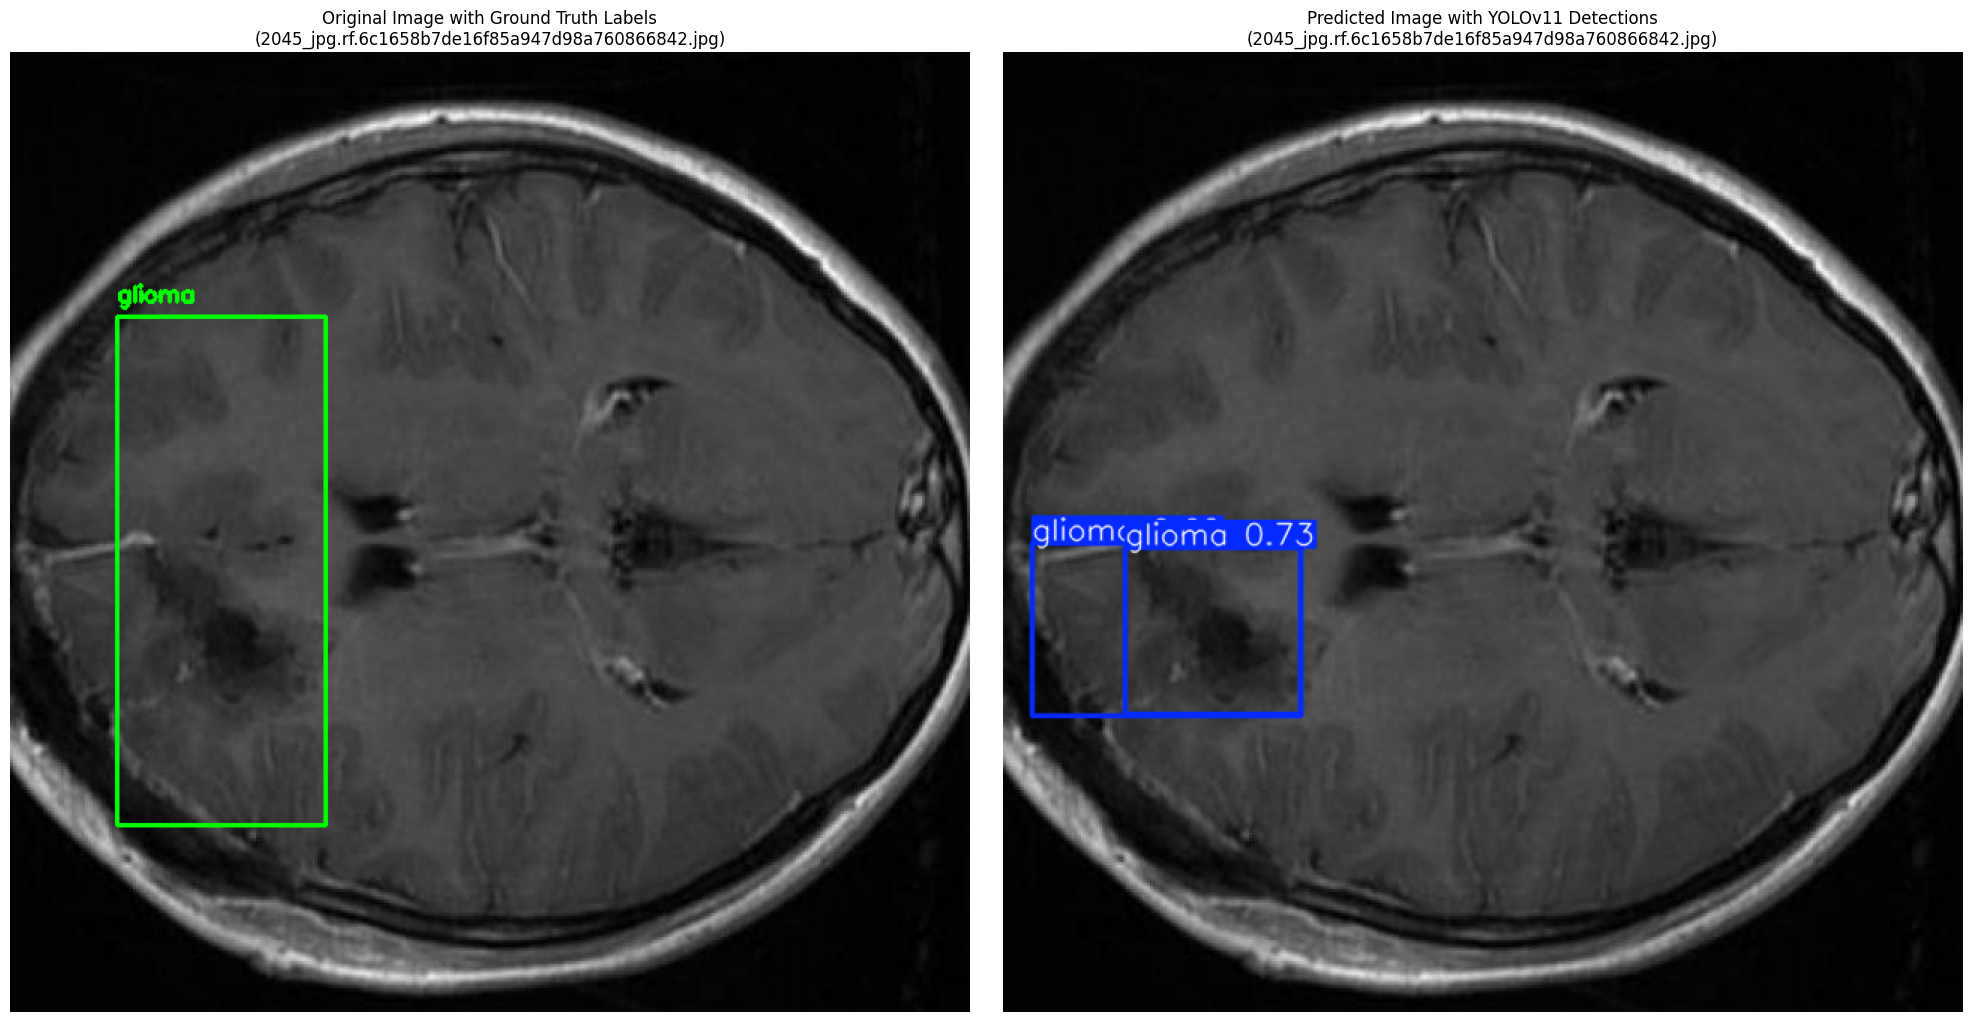


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/1951_jpg.rf.eb08d051c58cf70408f3def1b2f274de.jpg: 640x640 1 glioma, 8.7ms
Speed: 0.9ms preprocess, 8.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


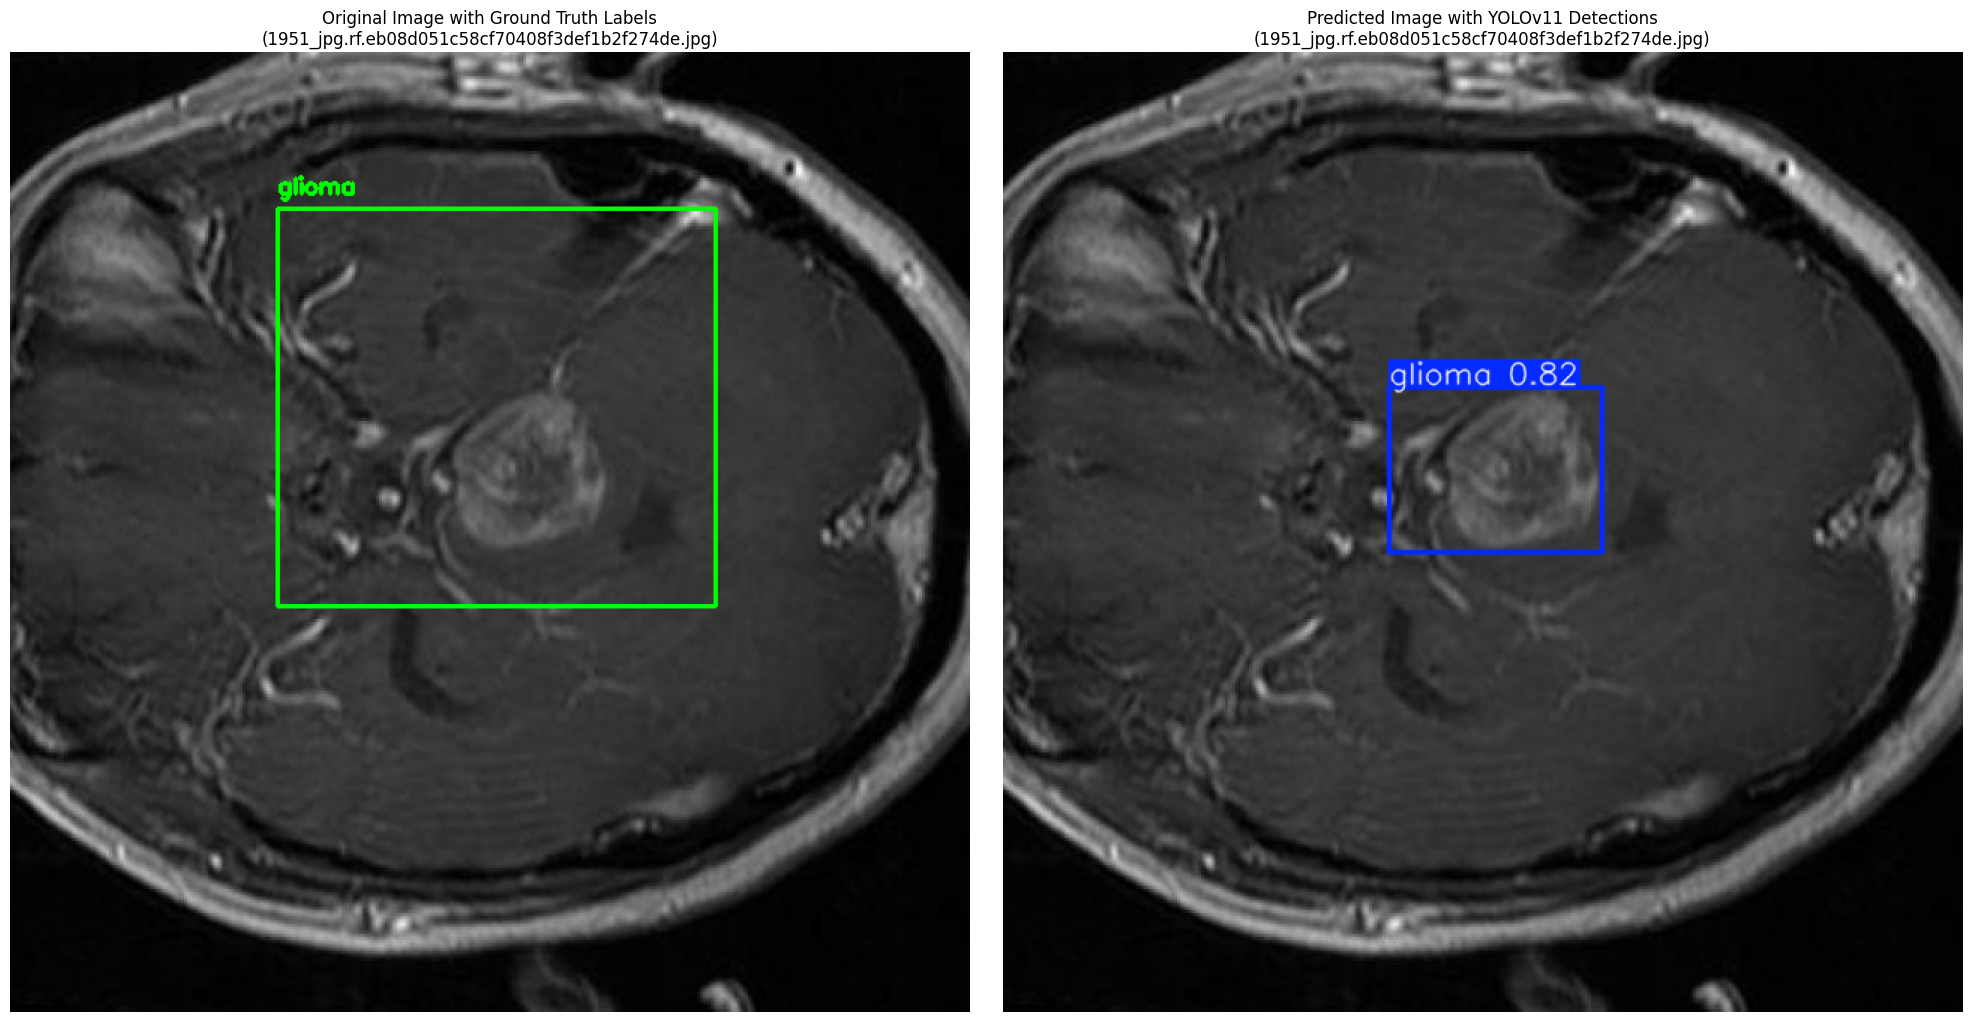


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/1710_jpg.rf.36fe9d822cf5079600022f12aa2d0f3a.jpg: 640x640 1 pituitary, 8.0ms
Speed: 0.8ms preprocess, 8.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


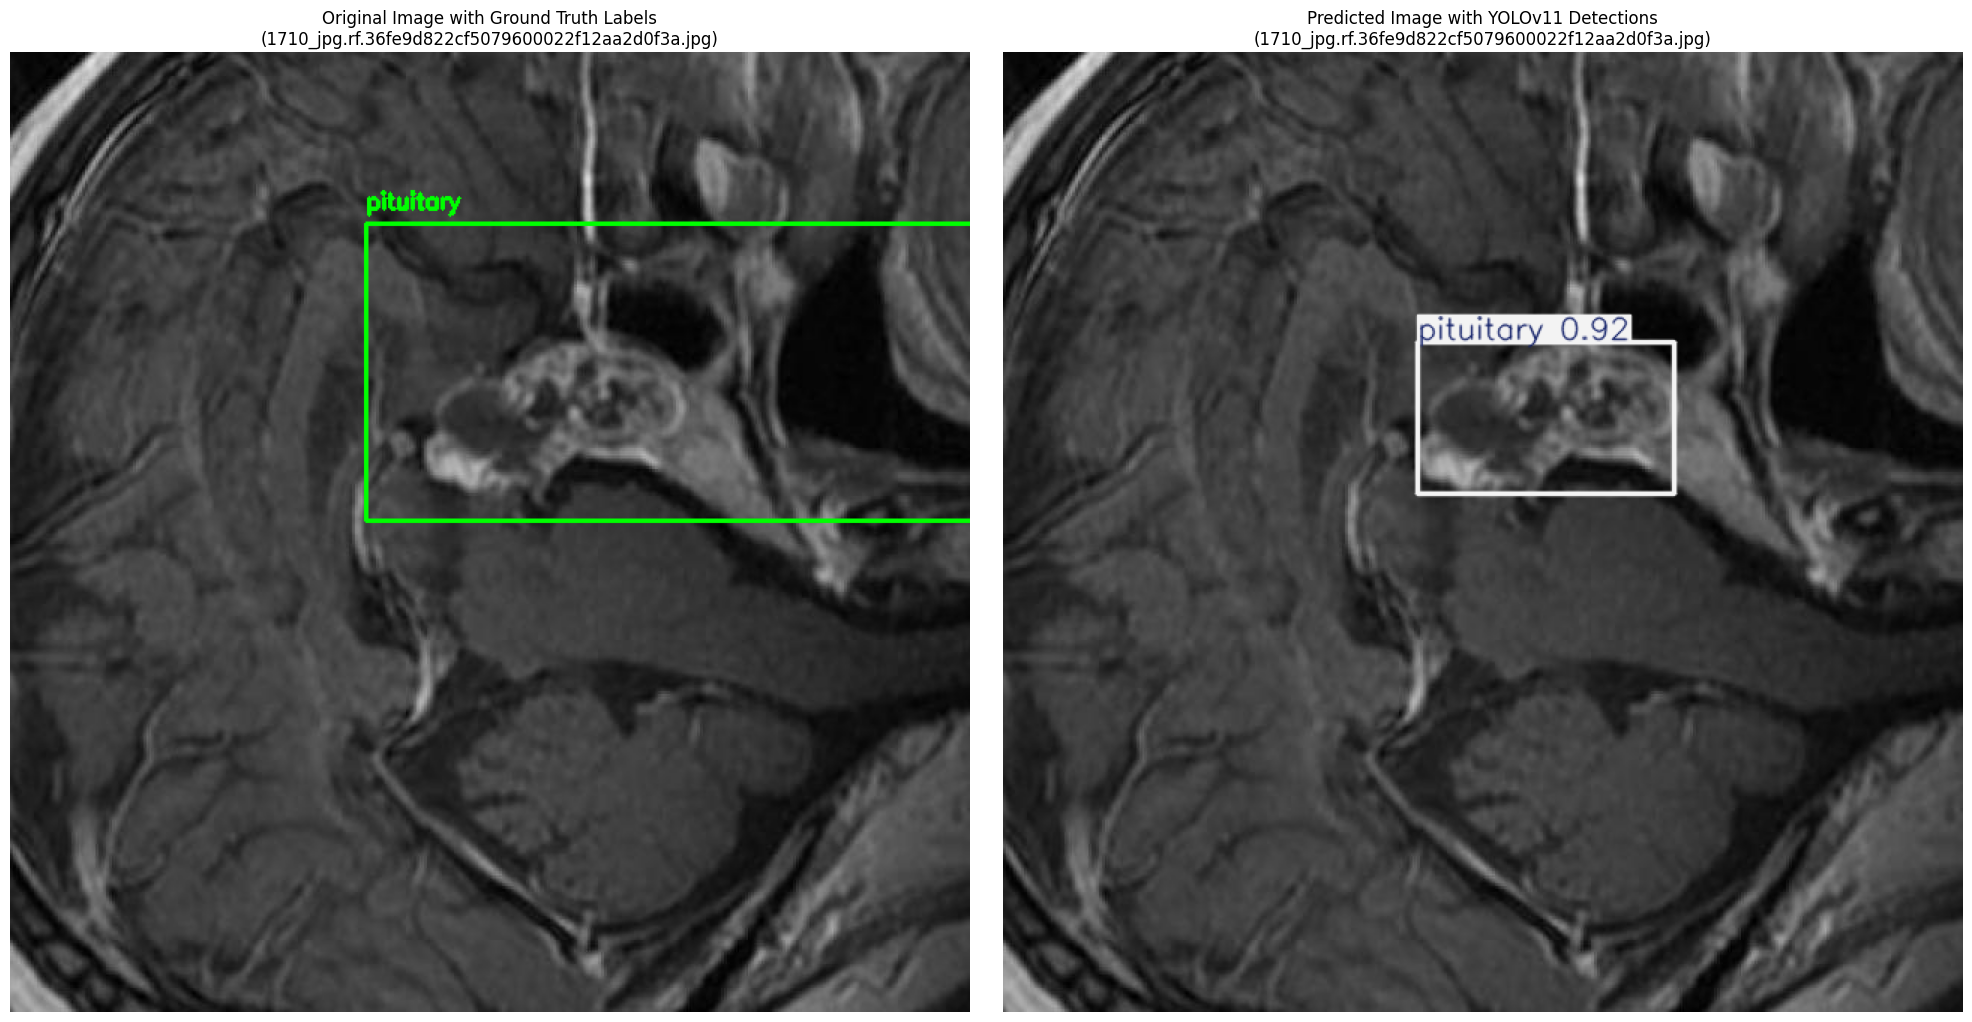


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/192_jpg.rf.8b107bb6b8fc883d1a0ae0cf4a5a330e.jpg: 640x640 1 meningioma, 9.9ms
Speed: 1.1ms preprocess, 9.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


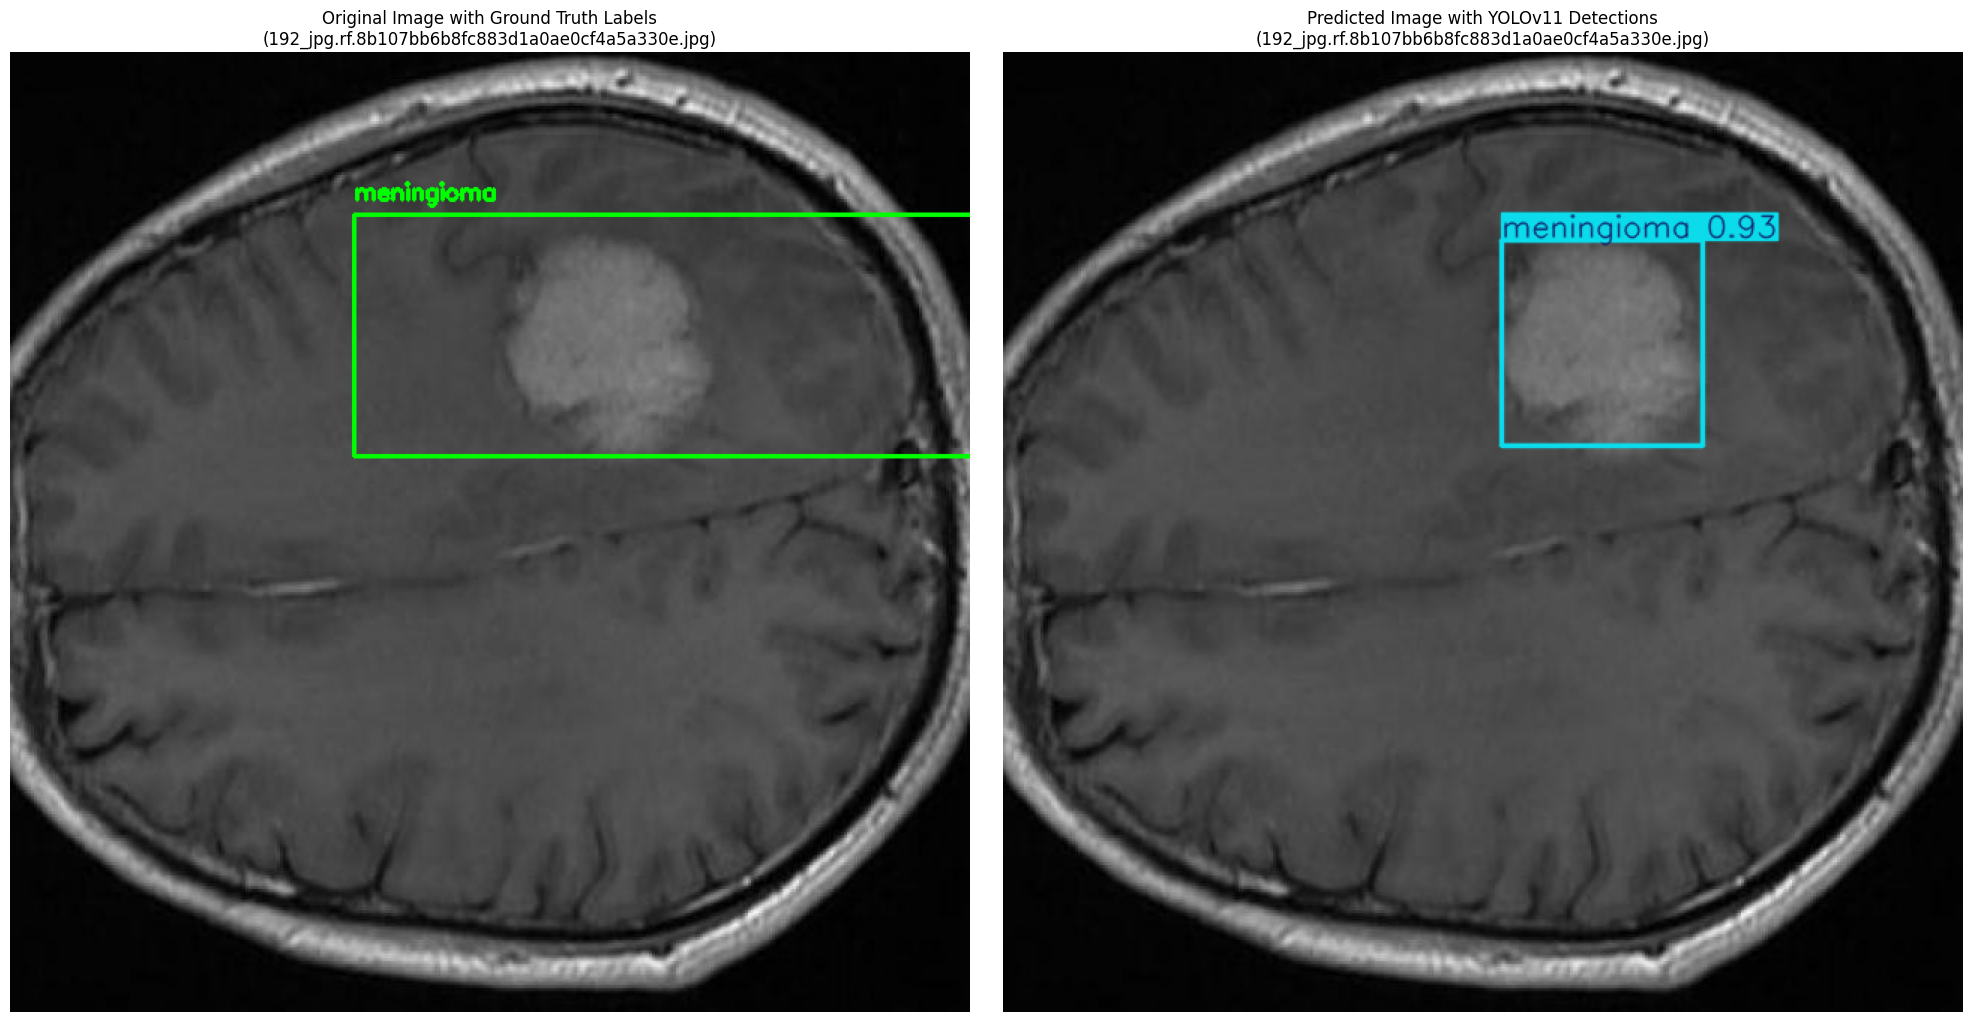


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/2781_jpg.rf.175843f75a531e87b7bd8bb7eed737f8.jpg: 640x640 1 glioma, 8.2ms
Speed: 0.8ms preprocess, 8.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


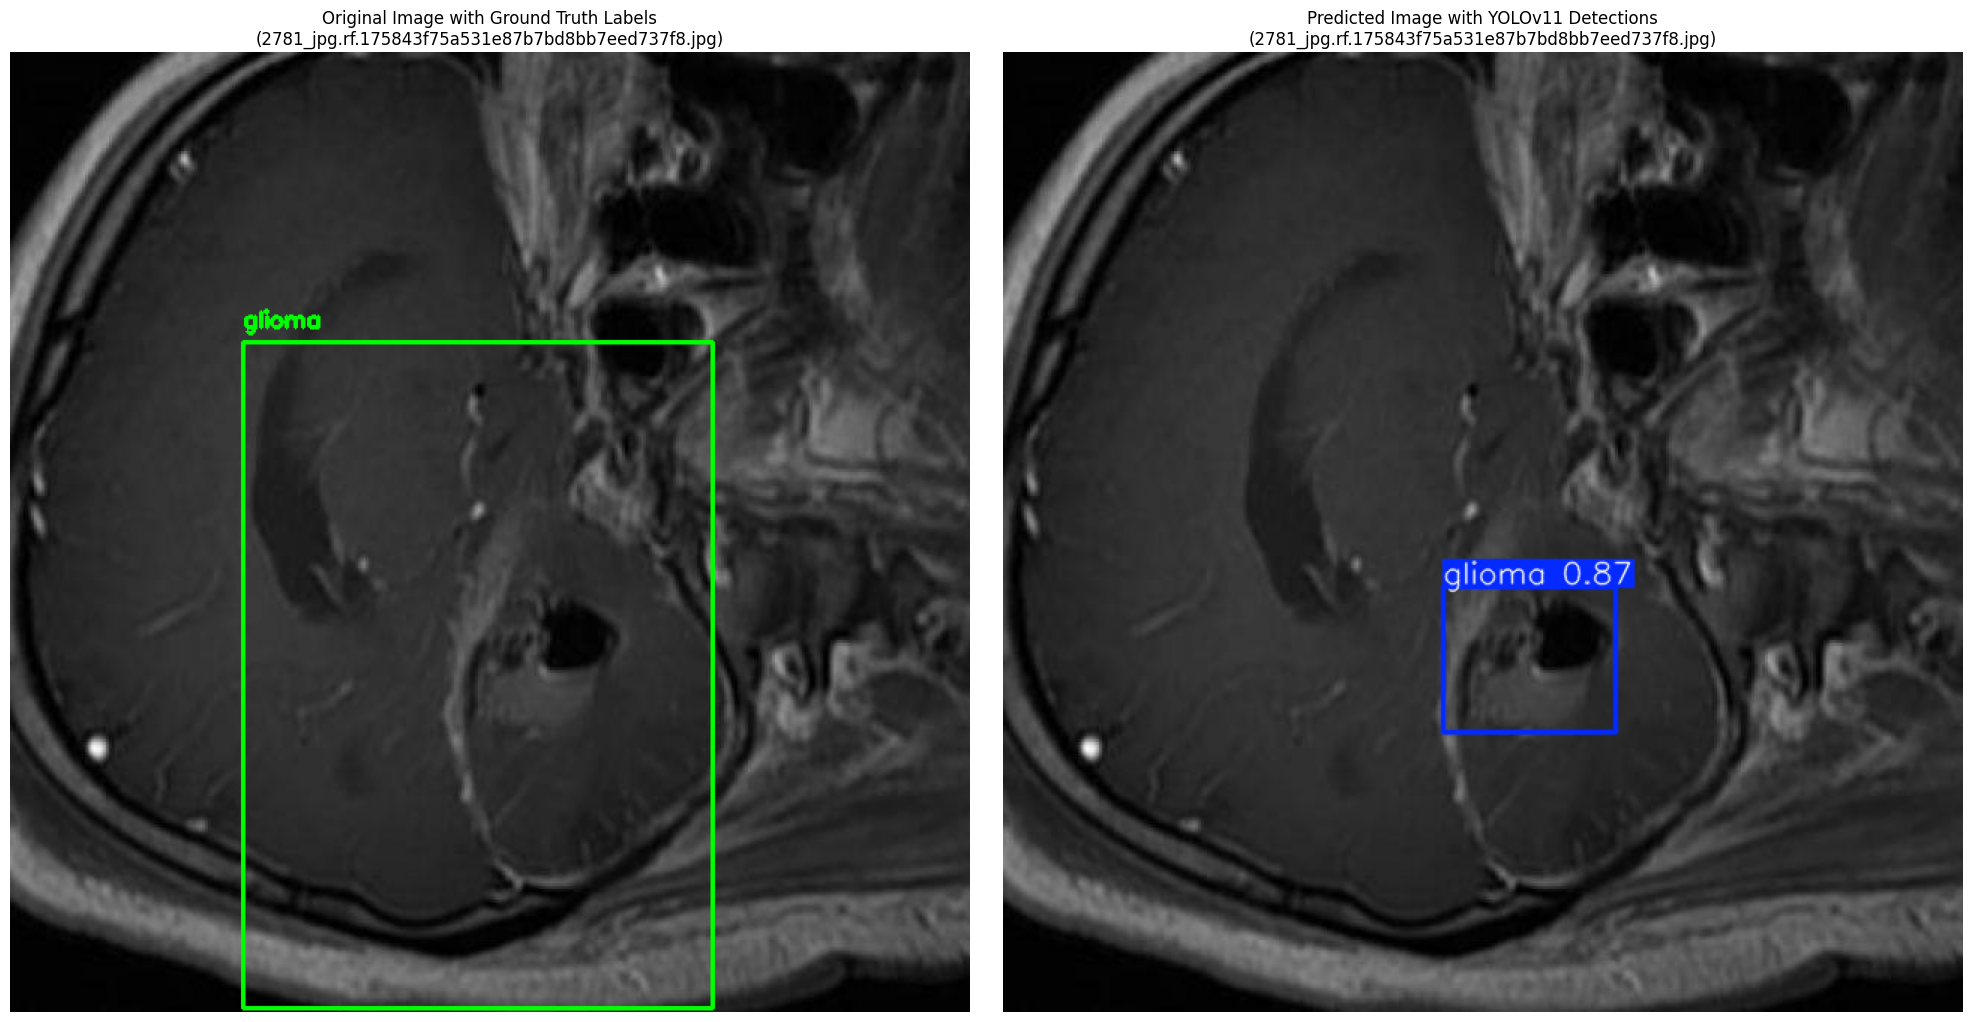


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/2904_jpg.rf.cbc4872603a5087d632f8ae70af6dfe9.jpg: 640x640 1 glioma, 8.4ms
Speed: 1.1ms preprocess, 8.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


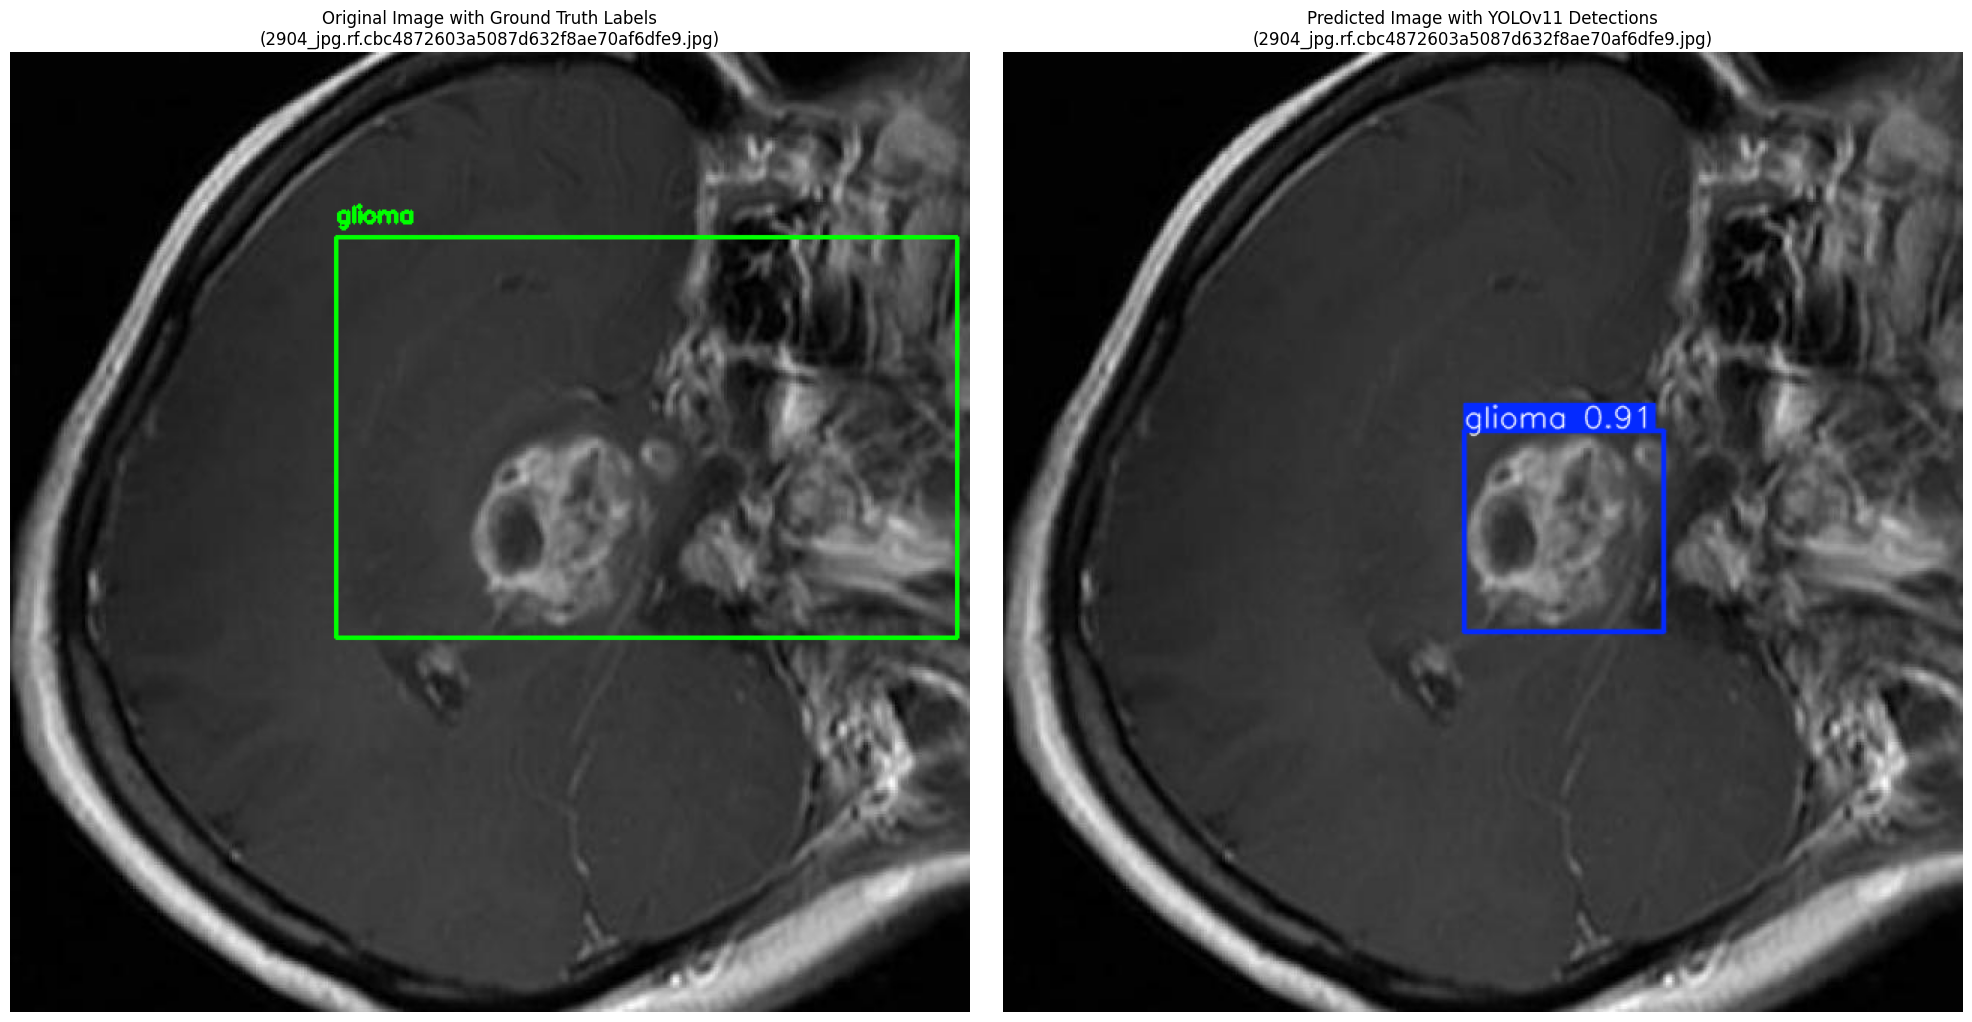


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/571_jpg.rf.ed65129e8c11ba5cc4761d5fbee49eff.jpg: 640x640 1 meningioma, 7.9ms
Speed: 0.8ms preprocess, 7.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


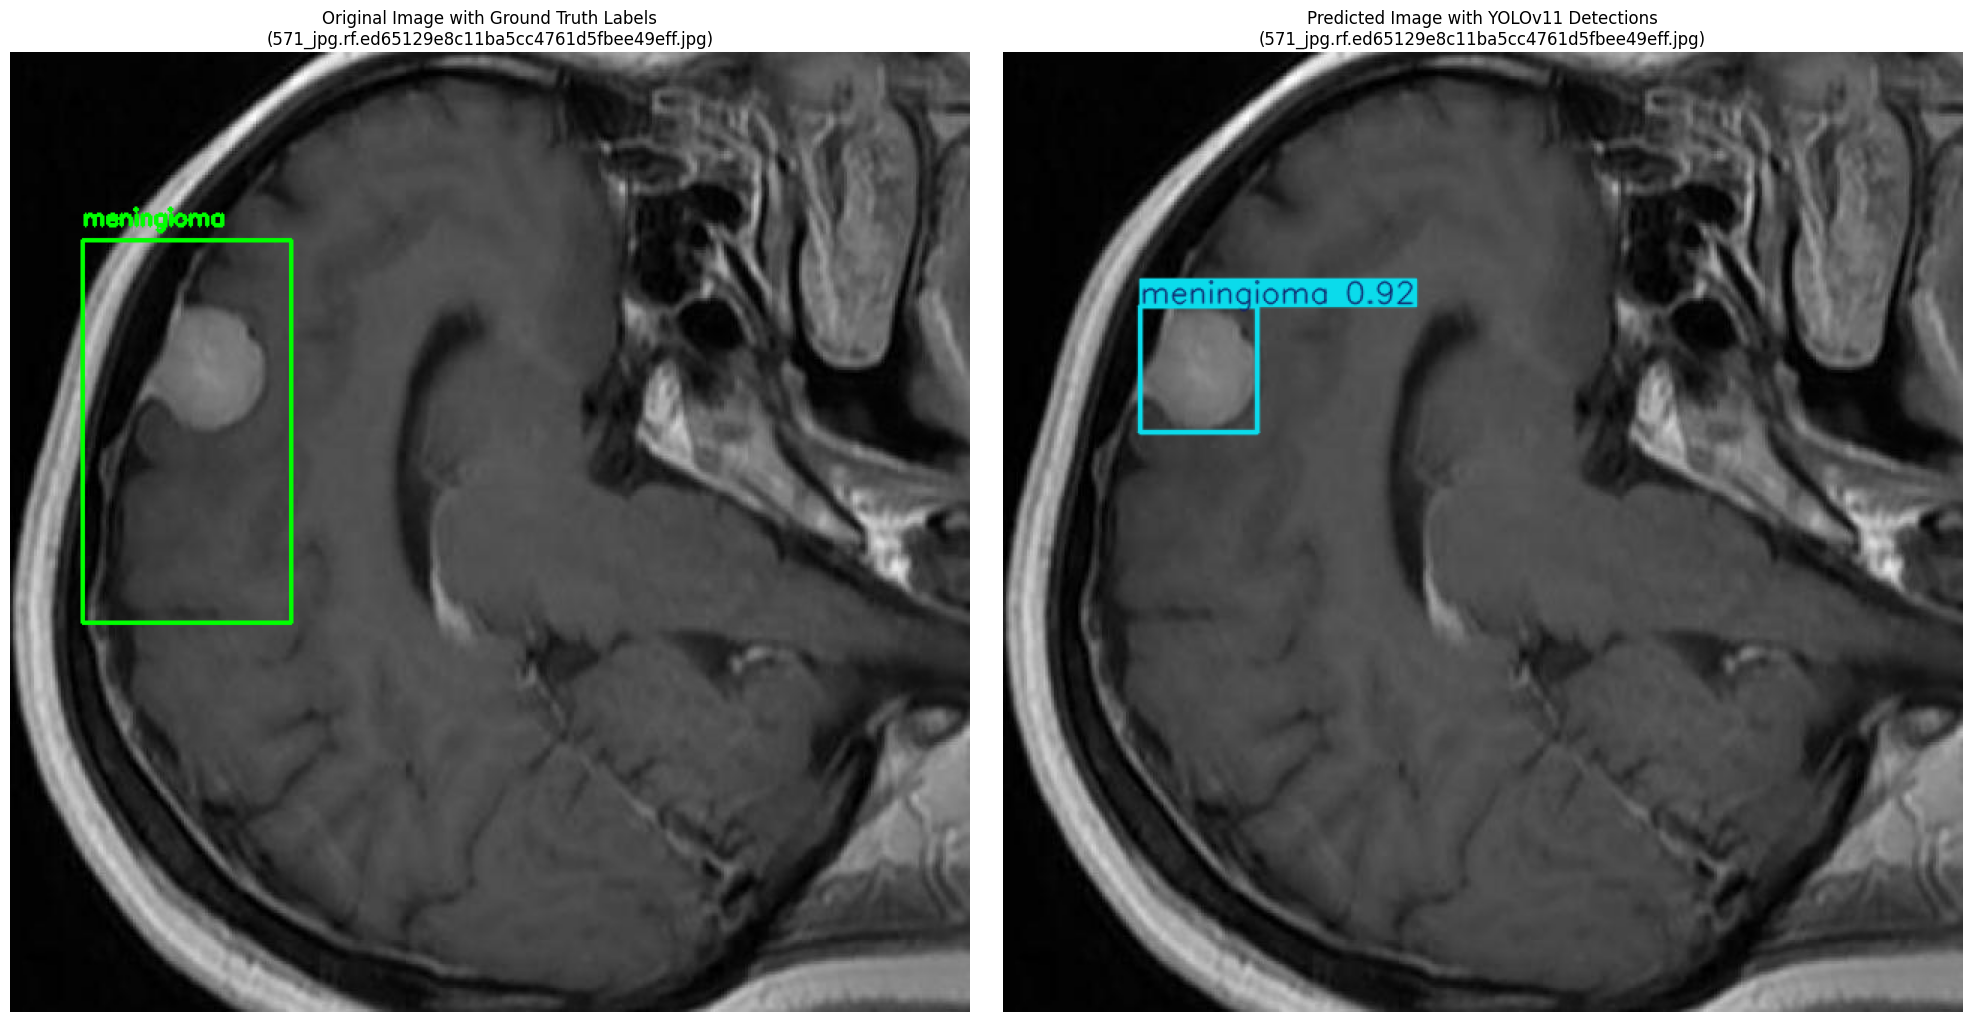


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/1018_jpg.rf.29ed2fb6754ca58ae27204ef24344650.jpg: 640x640 1 pituitary, 7.8ms
Speed: 1.0ms preprocess, 7.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


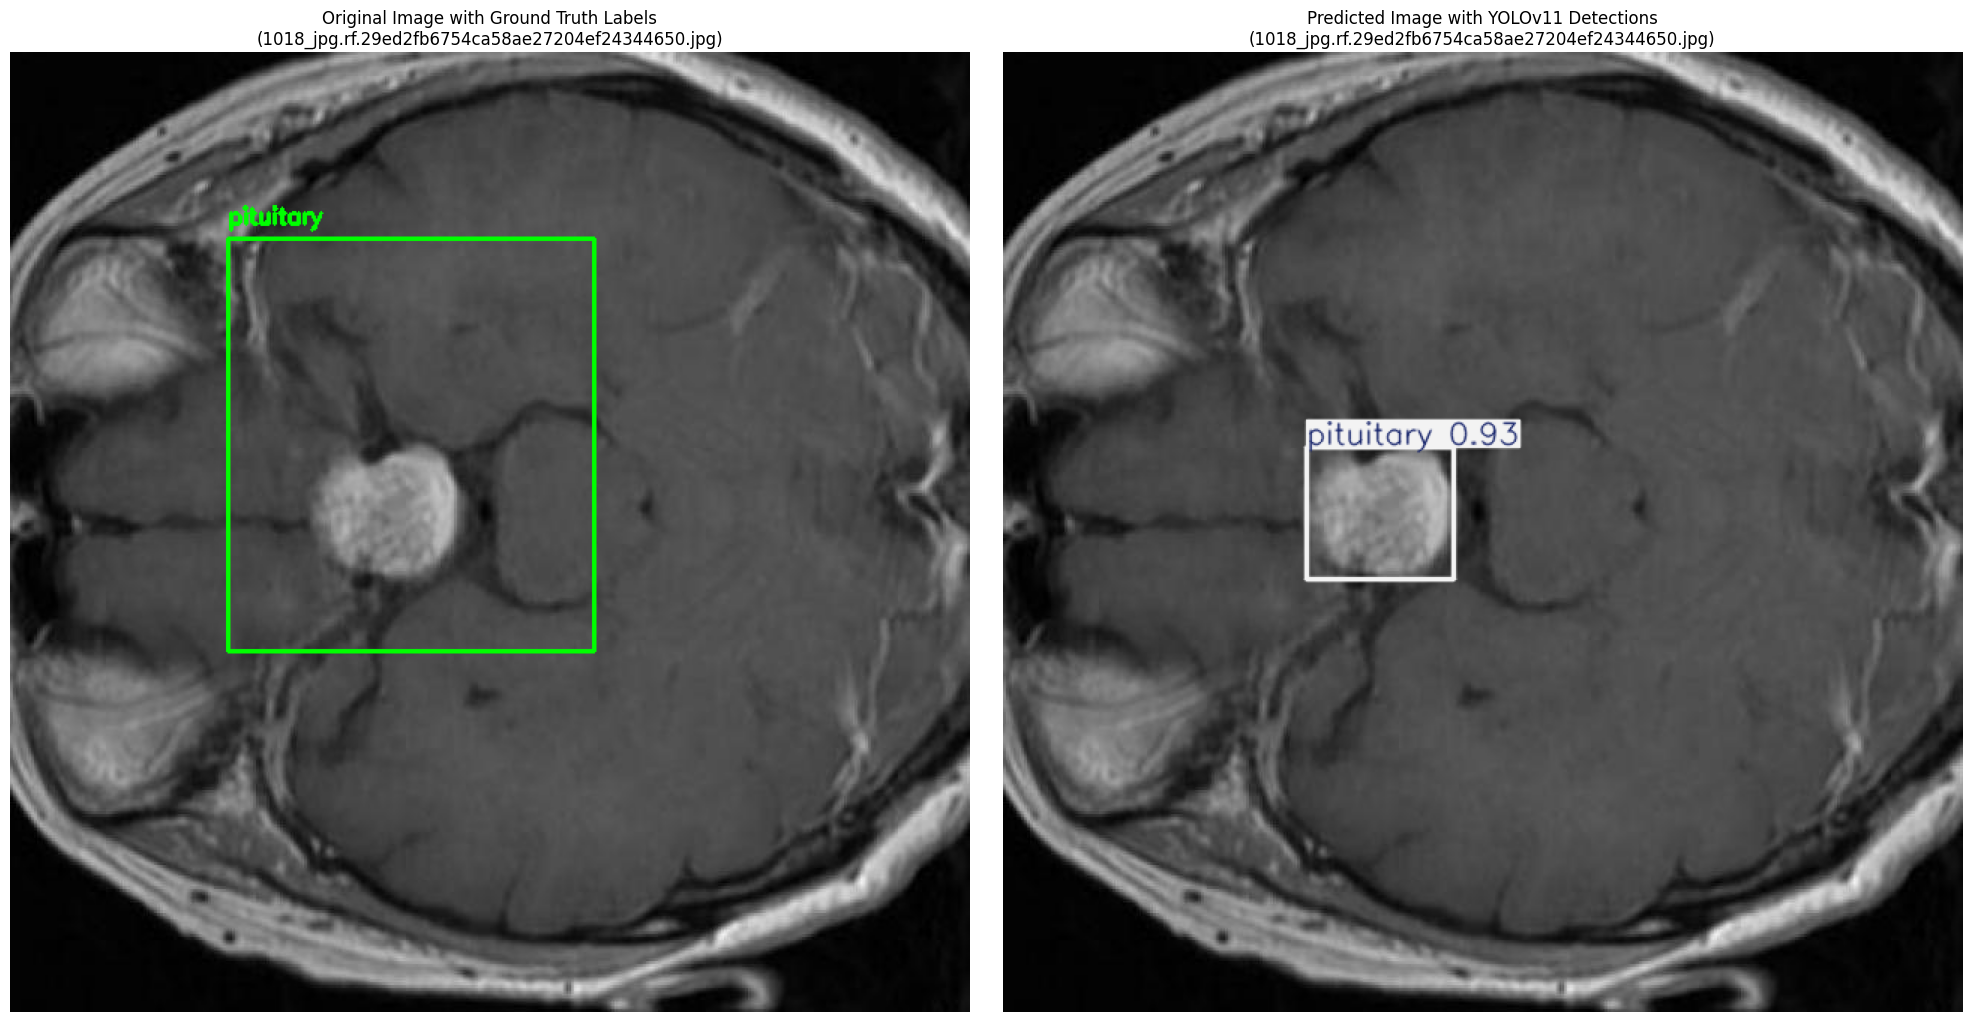


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/1583_jpg.rf.ea41474e5ffc139718847dffa4d8c2ee.jpg: 640x640 1 pituitary, 9.2ms
Speed: 0.8ms preprocess, 9.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


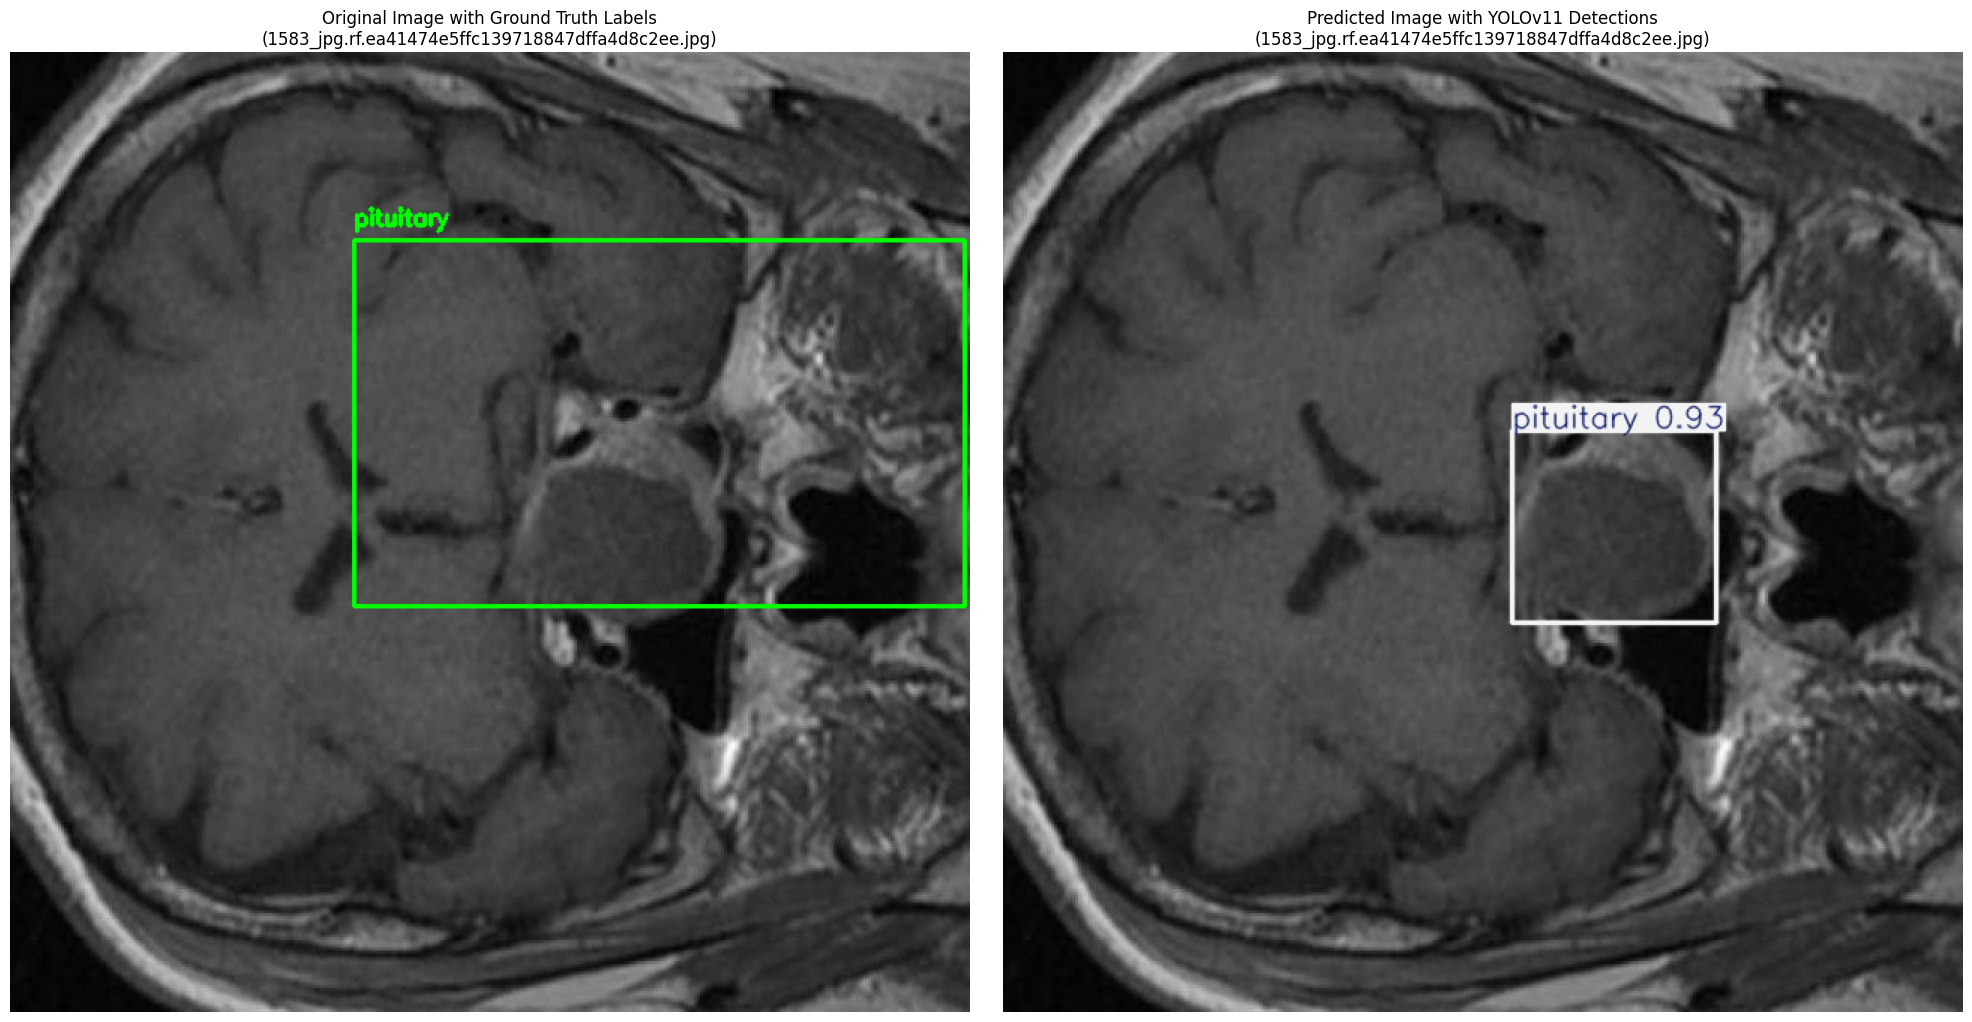


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/38_jpg.rf.1a9b0715faf5528bc2070c2b8e786241.jpg: 640x640 1 meningioma, 8.5ms
Speed: 1.2ms preprocess, 8.5ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


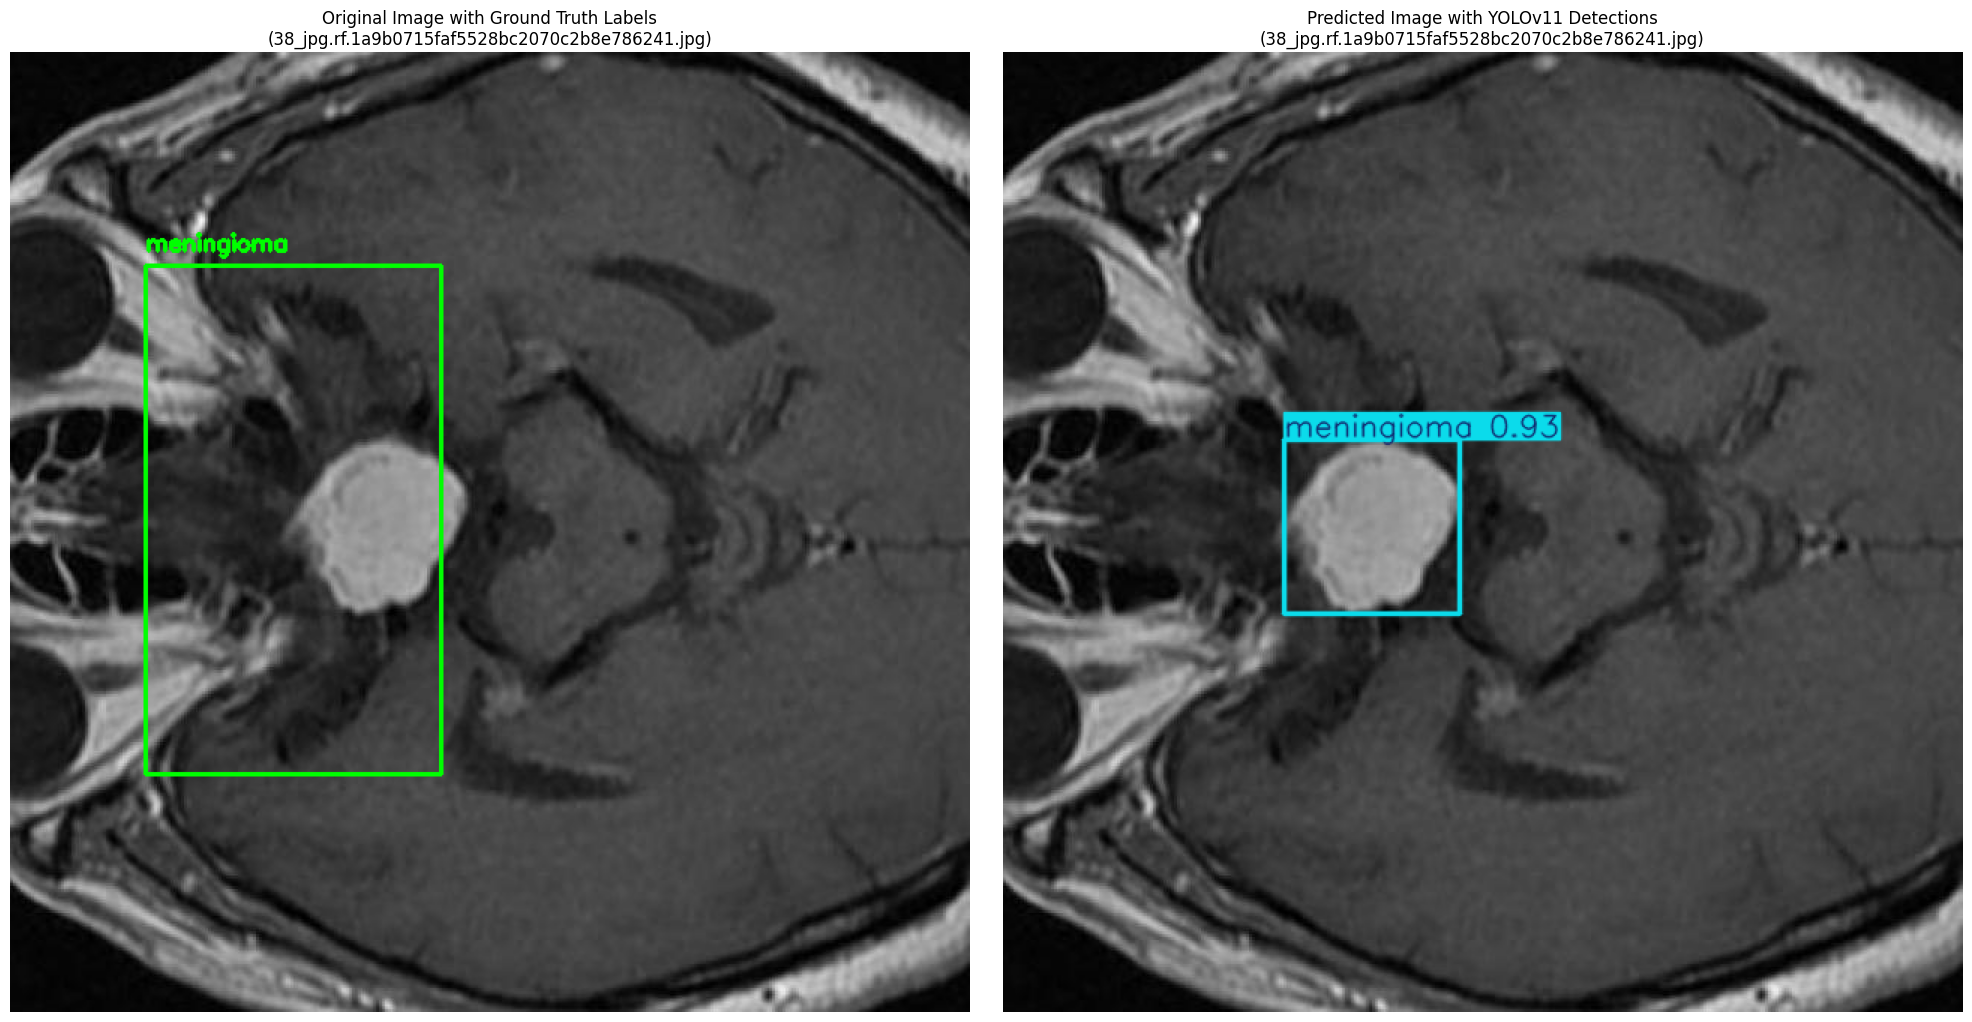

In [8]:
%matplotlib inline
for img_path in test_image_files:
    img_filename = os.path.basename(img_path)
    img_name_no_ext = os.path.splitext(img_filename)[0]
    label_path = os.path.join(TEST_LABELS_DIR, img_name_no_ext + '.txt')

    original_image = cv2.imread(img_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    ground_truth_annotations = []
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                parts = list(map(float, line.strip().split()))
                ground_truth_annotations.append(parts)

    ground_truth_image_display = draw_annotations(original_image.copy(), ground_truth_annotations, class_names, color=(0, 255, 0), is_gt=True)

    prediction_results = trained_model.predict(
        source=img_path,
        imgsz=IMG_SIZE,
        conf=CONF_THRESHOLD,
        # iou=IOU_THRESHOLD,
        # save=True,
        # save_txt=True,
        project=PREDICT_PROJECT_NAME,
        name=PREDICT_RUN_NAME,
        exist_ok=True
    )

    predicted_image_path_in_runs = os.path.join(PREDICT_PROJECT_NAME, PREDICT_RUN_NAME, img_filename)

    if os.path.exists(predicted_image_path_in_runs):
        predicted_image_display = cv2.imread(predicted_image_path_in_runs)
        predicted_image_display = cv2.cvtColor(predicted_image_display, cv2.COLOR_BGR2RGB)
    else:
        print(f"Warning: Predicted image not found at {predicted_image_path_in_runs}. Plotting from results.")
        if prediction_results:
            r = prediction_results[0]
            im_np = r.plot()
            predicted_image_display = cv2.cvtColor(im_np, cv2.COLOR_BGR2RGB)
        else:
            predicted_image_display = np.zeros_like(original_image)

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    axes[0].imshow(ground_truth_image_display)
    axes[0].set_title(f'Original Image with Ground Truth Labels\n({img_filename})')
    axes[0].axis('off')

    axes[1].imshow(predicted_image_display)
    axes[1].set_title(f'Predicted Image with YOLOv11 Detections\n({img_filename})')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()